
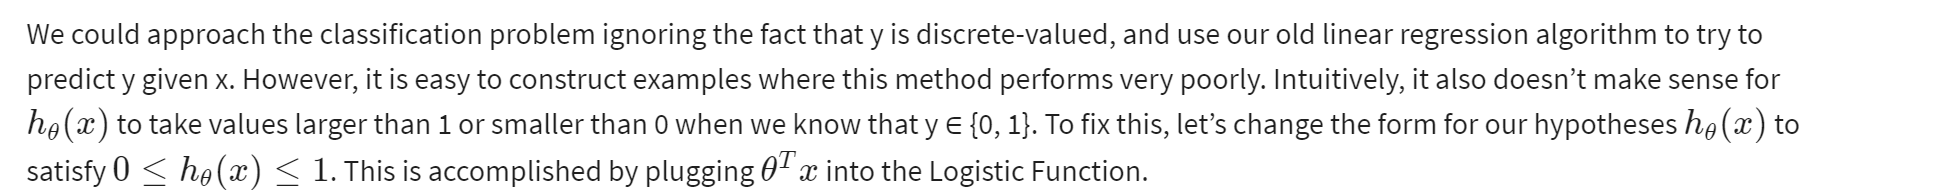

That's where Logistic regression comes into the picture. which is ironically is classficaion algorithms 

Logistic Regression is also called a sigmoid function, which maps real numbers into probabilities, range in [0, 1]. Hence, the value of sigmoid function means how certain the data belongs to a category.

1. Note that y represents the label, y=1 is the goal label and y=0 is the other label, and in sigmoid function, we always concern about the goal label.
2. In most cases, we take 0.5 as the threshold of probability. If h(x)≥0.5, we predict the data belongs to label 1, while h(x)<0.5, we predict the data belongs to label 0.

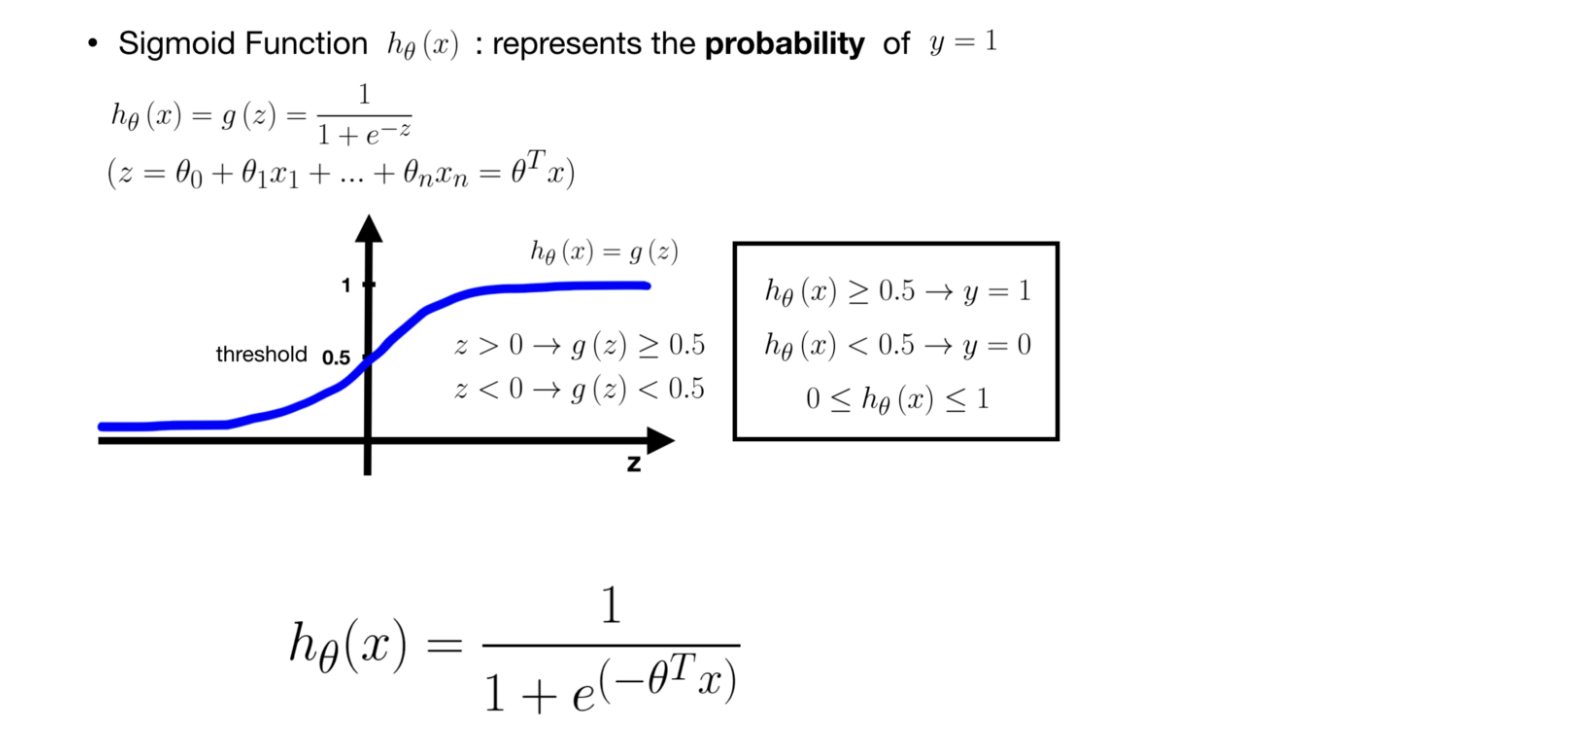

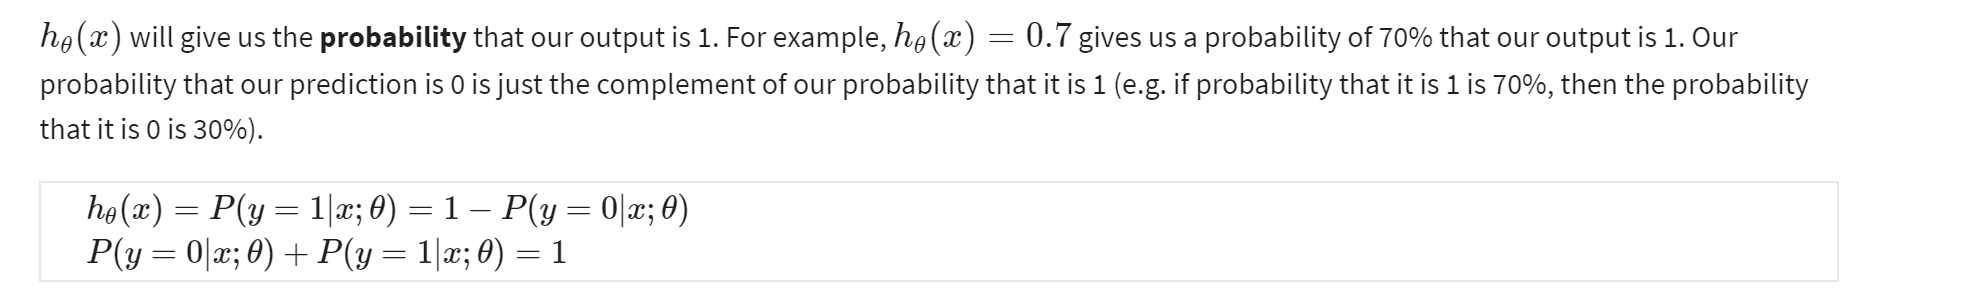

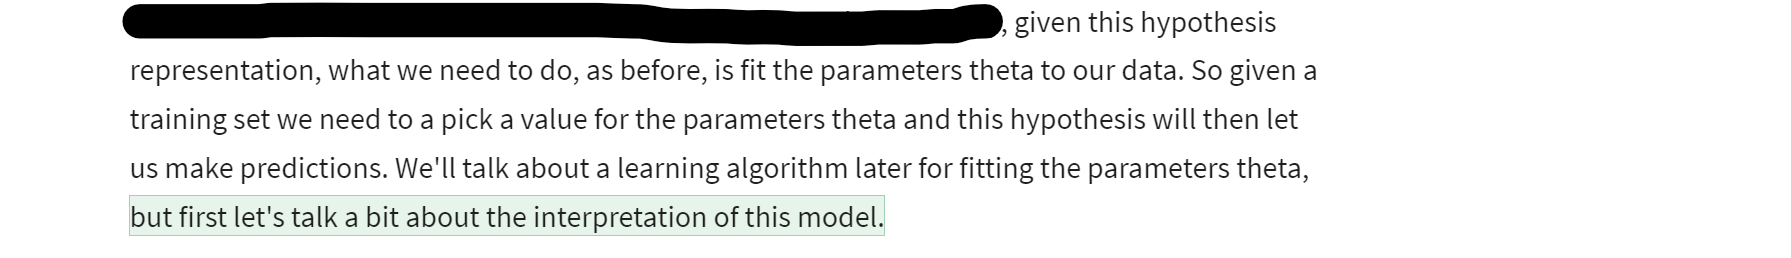

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot


In [2]:
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

In [3]:
data[:5]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [4]:
def plotData(x,y):
    # Create New Figure
    fig = pyplot.figure()

    # ====================== YOUR CODE HERE ======================
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

    pyplot.xlabel('Exam 1 score')
    pyplot.ylabel('Exam 2 score')
    pyplot.legend(['Admitted', 'Not admitted'])

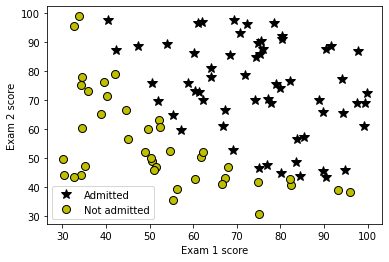

In [5]:
plotData(X,y)

In [6]:
def sigmoid(z):
    """
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    g = 1/ (1 + np.exp(-z))

    # =============================================================
    return g

In [7]:
z = 0
g = sigmoid(z)

print('g(',z,') = ', g)

g( 0 ) =  0.5


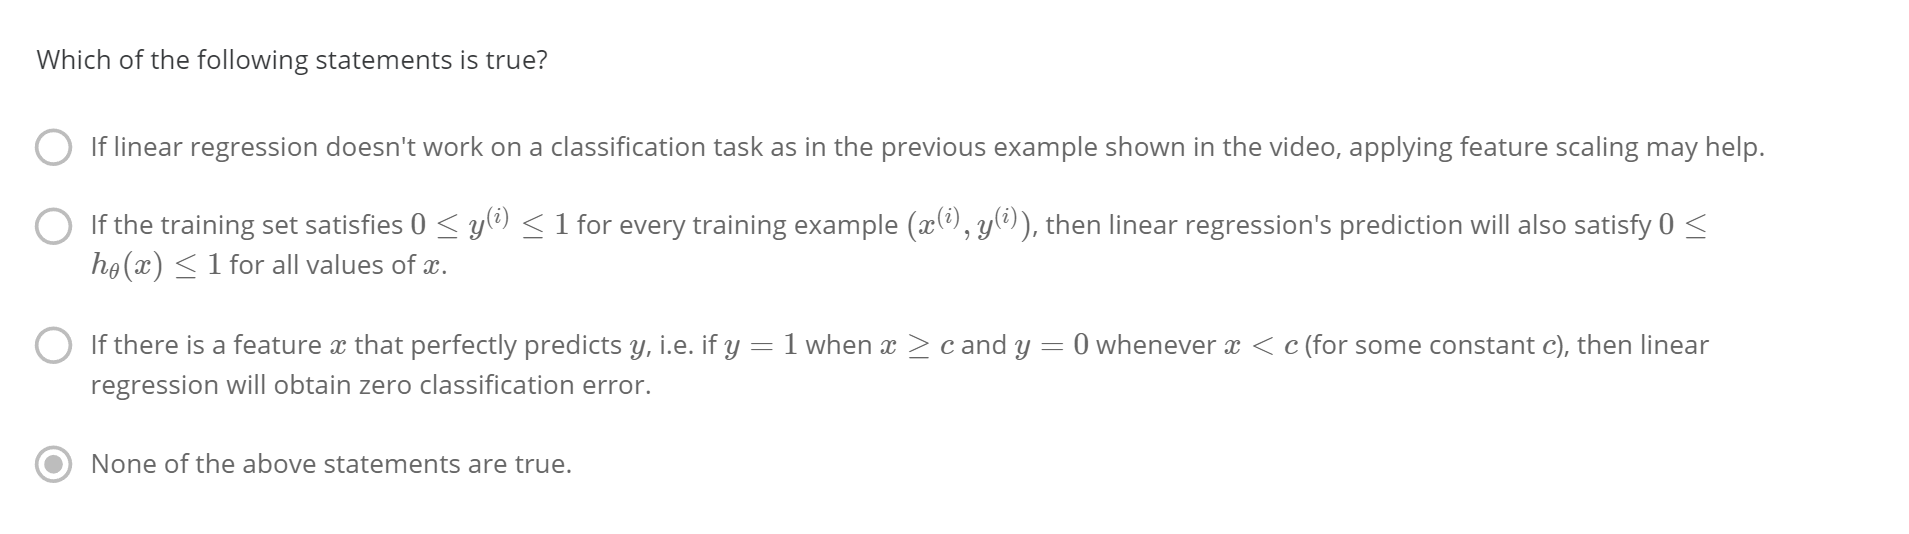

#### Decision Boundary 

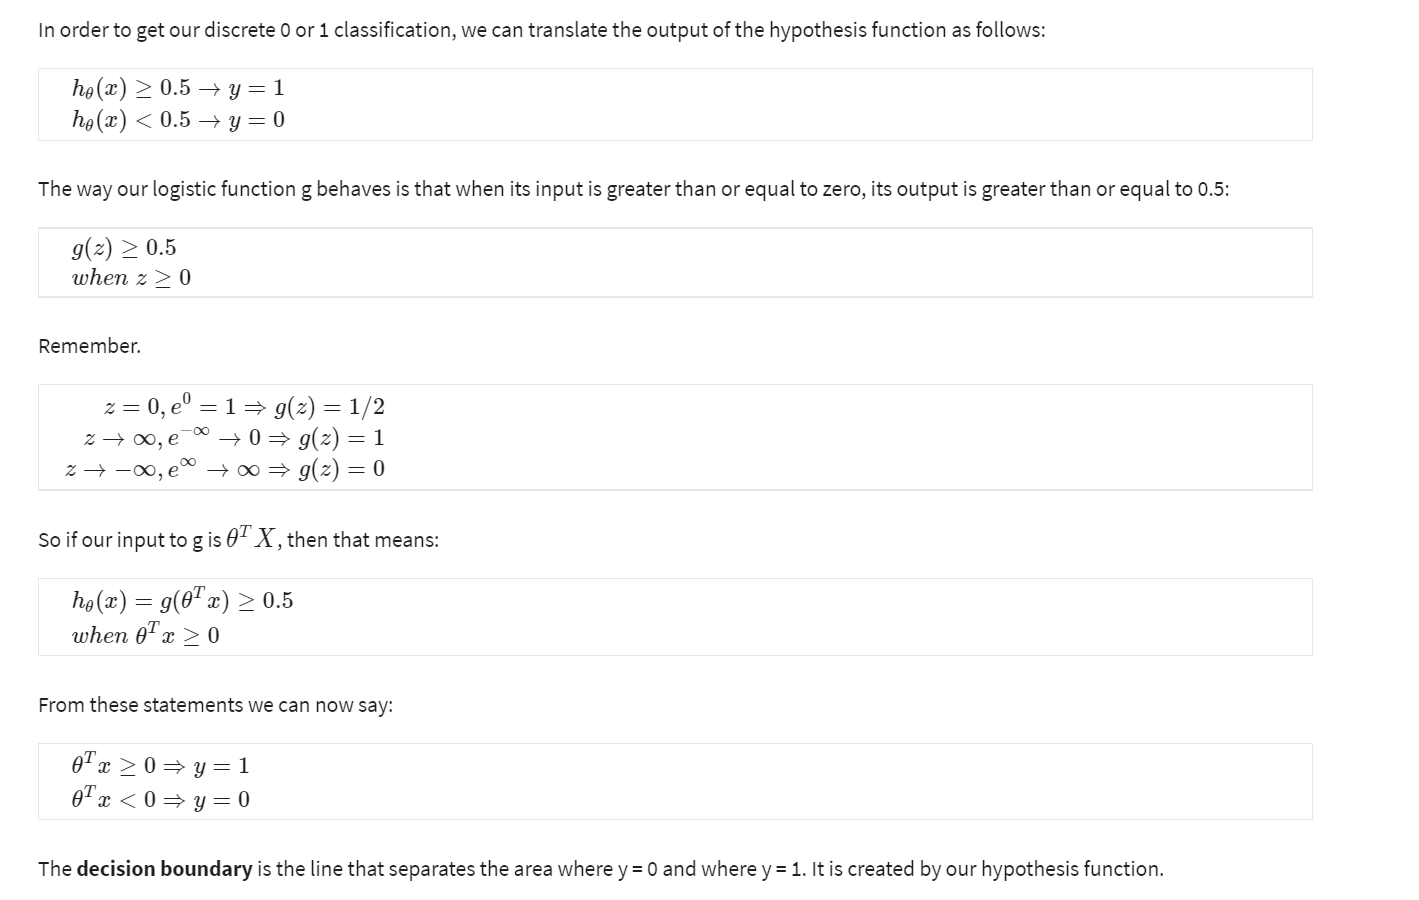

Preparing Dataset - suppose we have a breast detection dataset, each one has two features and one label.

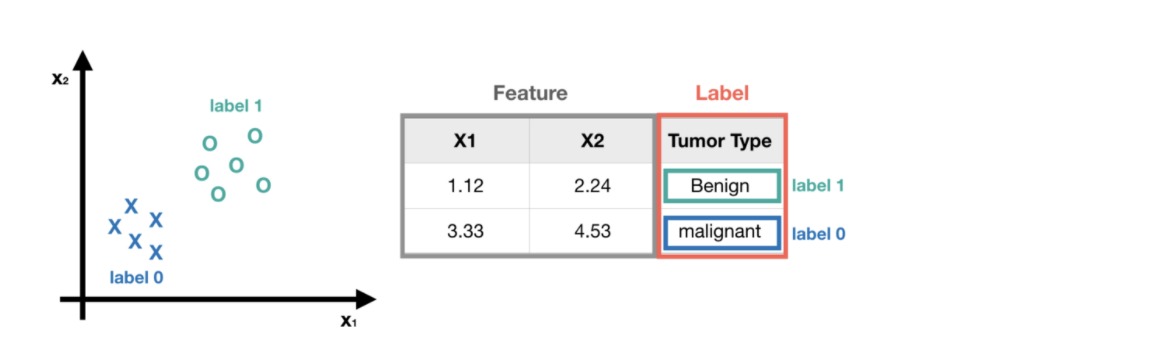

Getting Parameters - after learning process, we get a nice model, that is, we get the parameters of logistic regression. Here, we assume they are -3, 1 and 1.

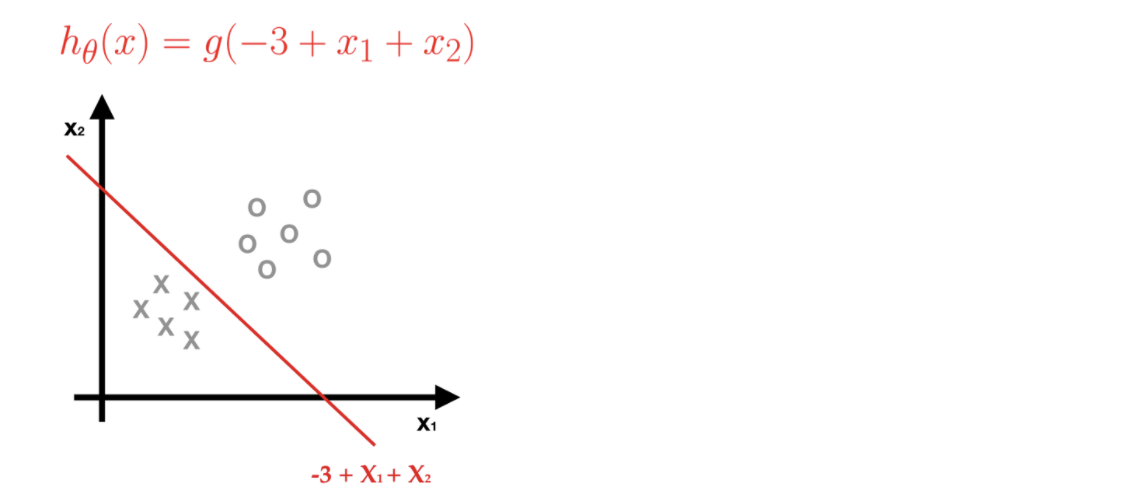

Predicting Labels — according to the sigmoid function with learned parameters.

1. If the -3+x1+x2≥0, it means h(x)≥0.5, then we predict this tumor is benign (label 1).
2. If not, then we predict this tumor is malignant (label 0)

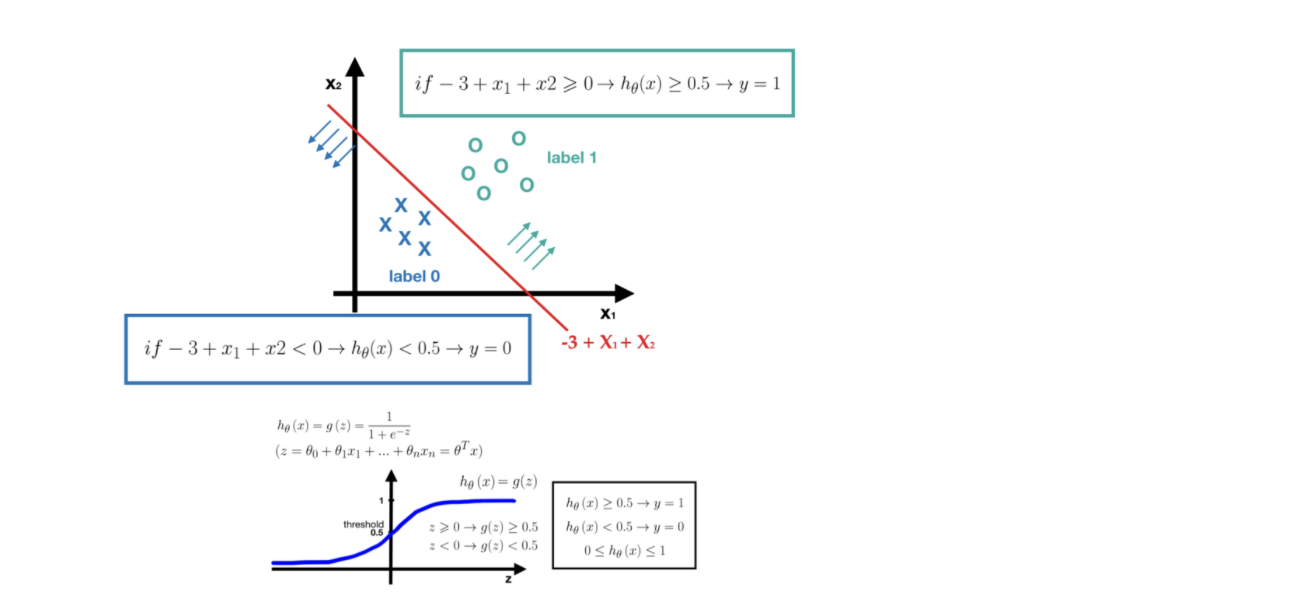

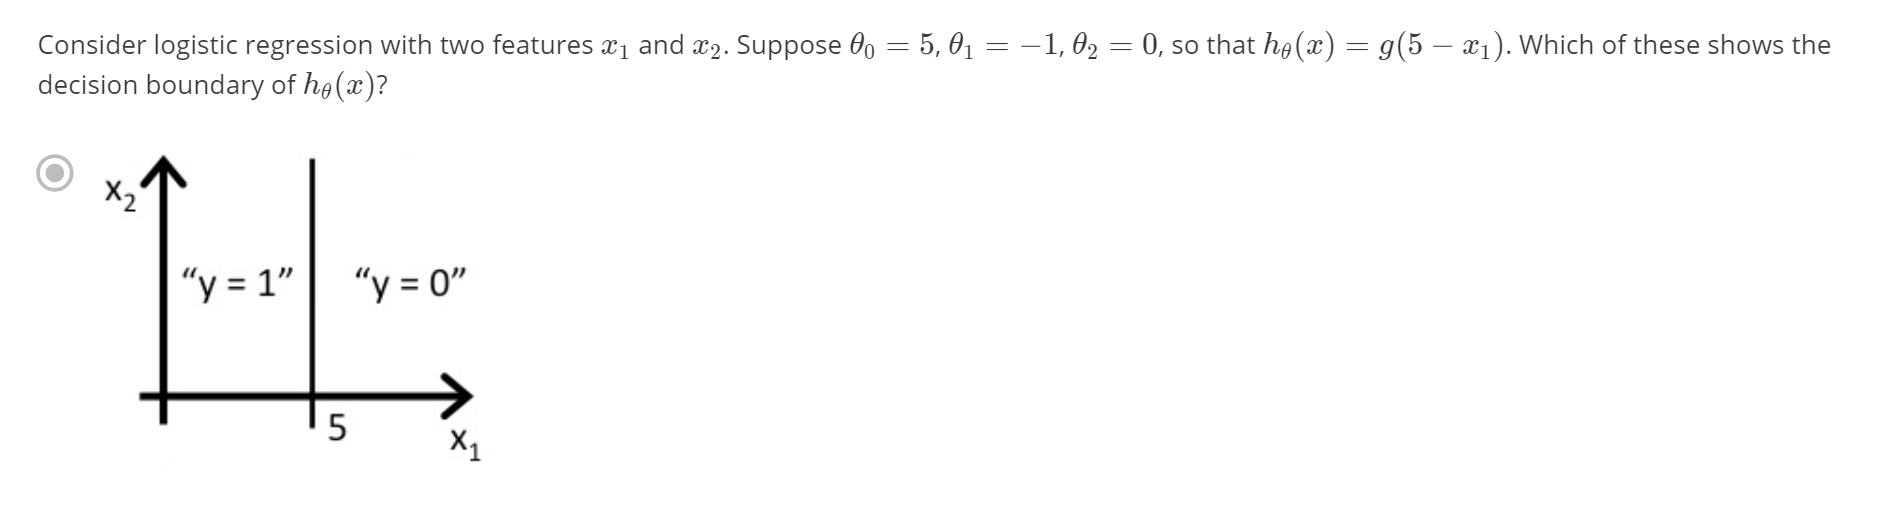

In [8]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In the following picture, although the label of point A and point B are both 1, their probabilities are different, and P(B∈1)>P(A∈1). 

When a point is farther away from the redline, this label is more determinable. Whereas when a point is right on the redline, the predictor can’t surely determine which label the point shall belong to since the probabilities are the same, P(a∈label0)=P(a∈label1)=0.5. That’s quite intuition.

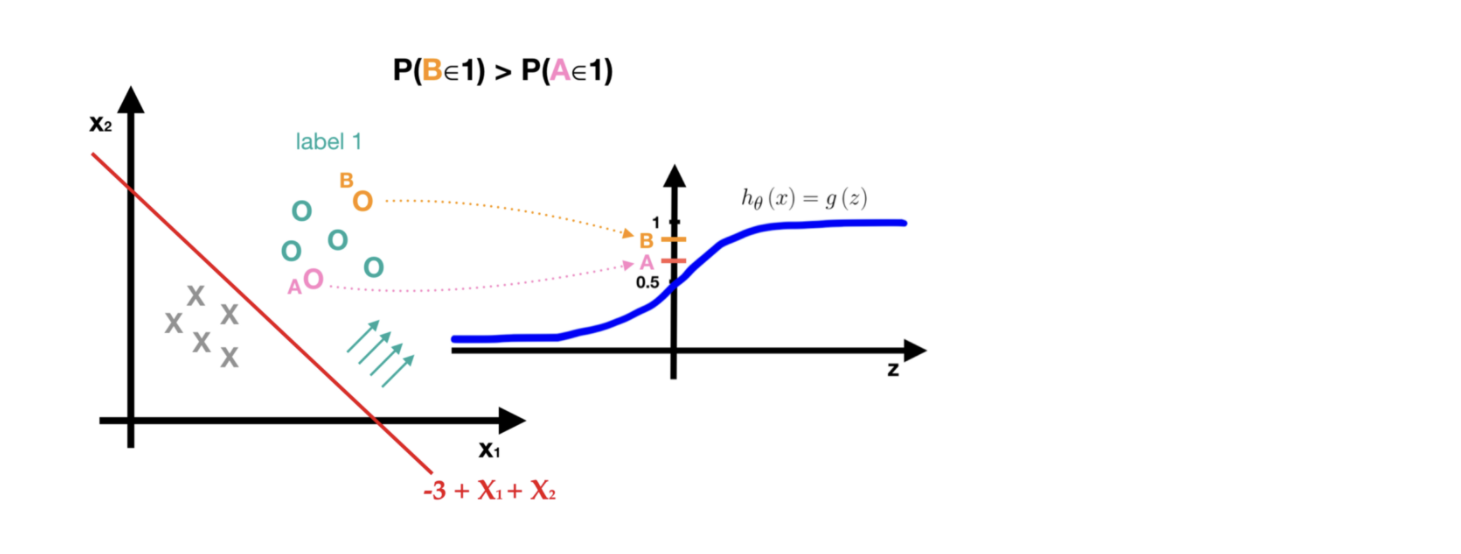

#### Non-linear decision boundaries

Get logistic regression to fit a complex non-linear data set Like polynomial regress add higher order terms:

So say we have
hθ(x) = g($θ_0$ + $θ_1$x1 + $θ_3x1^2$ + $θ_4x2^2$)

For Example,
Predict that "y = 1"
1. if -1 + $x1^2$ + $x2^2$ >= 0
2. or  $x1^2$ + $x2^2$ >= 1

If we plot $x1^2$ + $x2^2$ = 1
This gives us a circle with a radius of 1 around 0


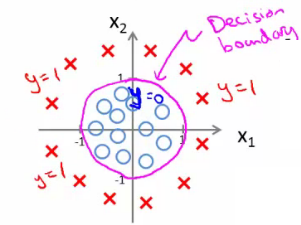



### Cost Function

We cannot use the same cost function that we use for linear regression because the Logistic Function will cause the output to be wavy, causing many local optima. In other words, it will not be a convex function.

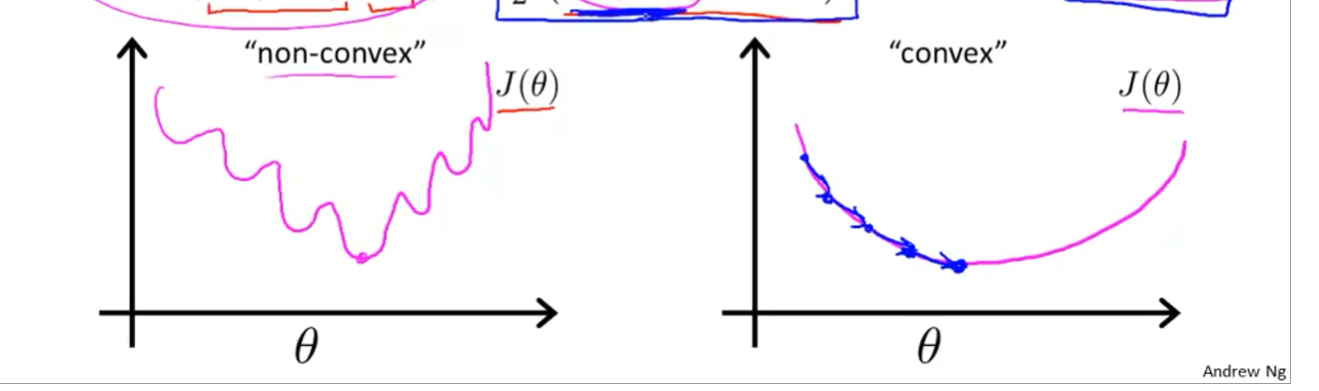

To get the convex cost function, Instead our cost function for logistic regression looks like:

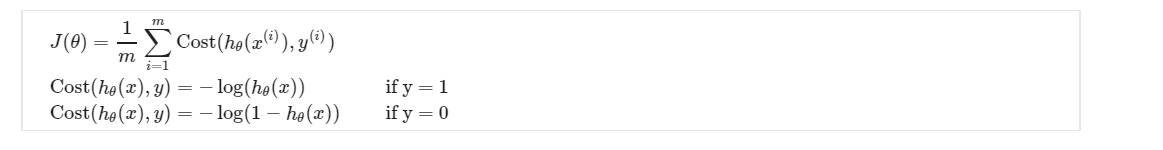

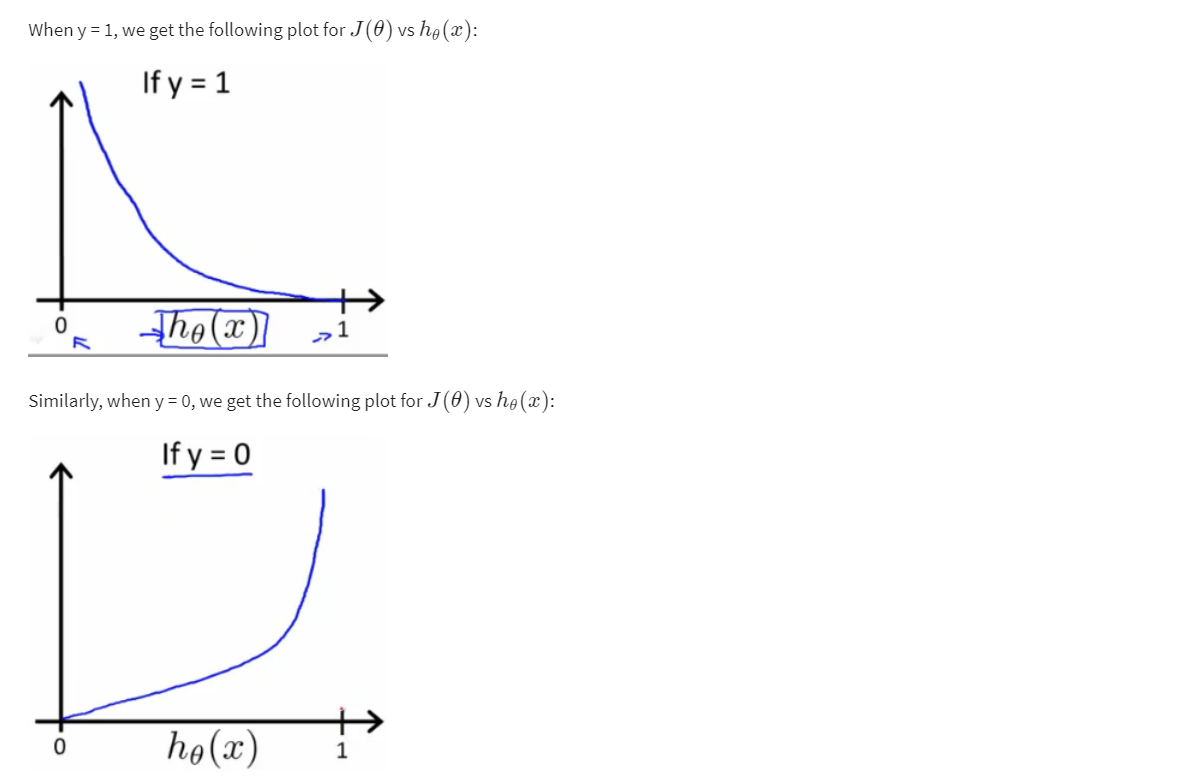

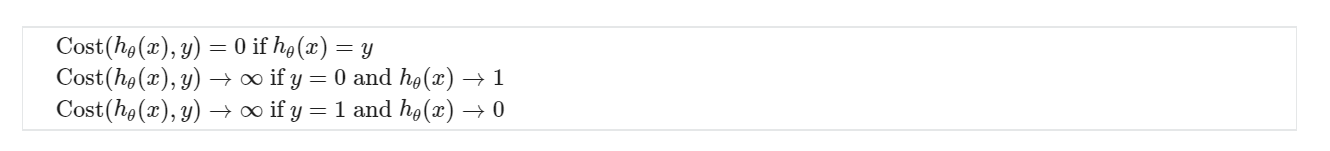

If our correct answer 'y' is 0, then the cost function will be 0 if our hypothesis function also outputs 0. If our hypothesis approaches 1, then the cost function will approach infinity.

If our correct answer 'y' is 1, then the cost function will be 0 if our hypothesis function outputs 1. If our hypothesis approaches 0, then the cost function will approach infinity.

Note that writing the cost function in this way guarantees that J(θ) is convex for logistic regression.

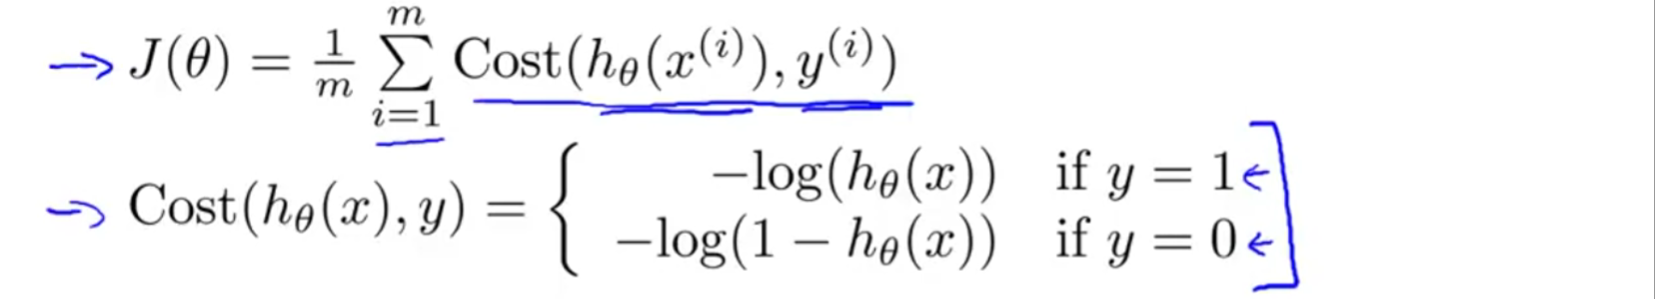

We can fully write out our entire cost function as follows:

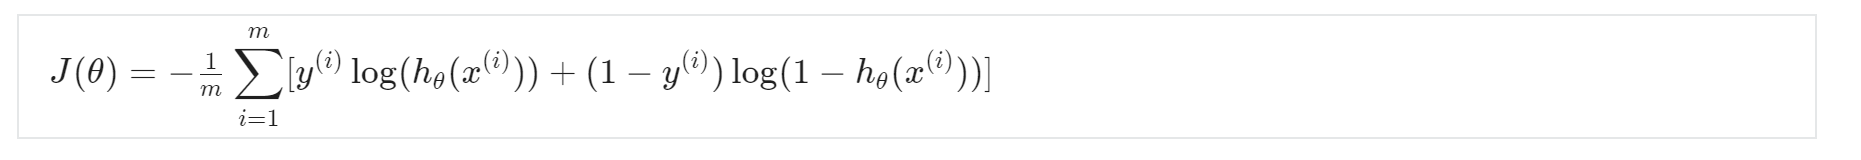

A vectorized implementation is:

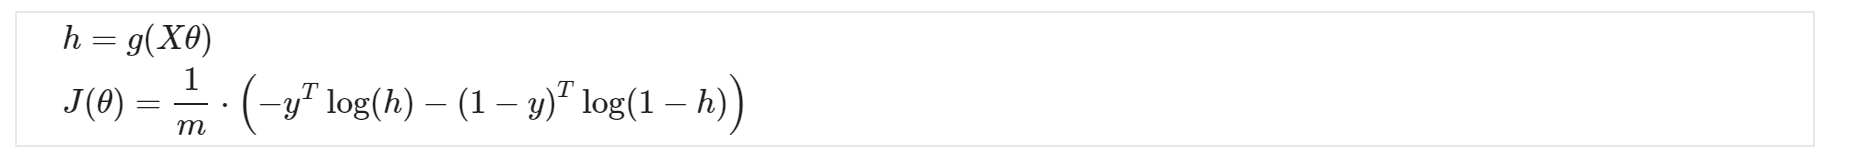

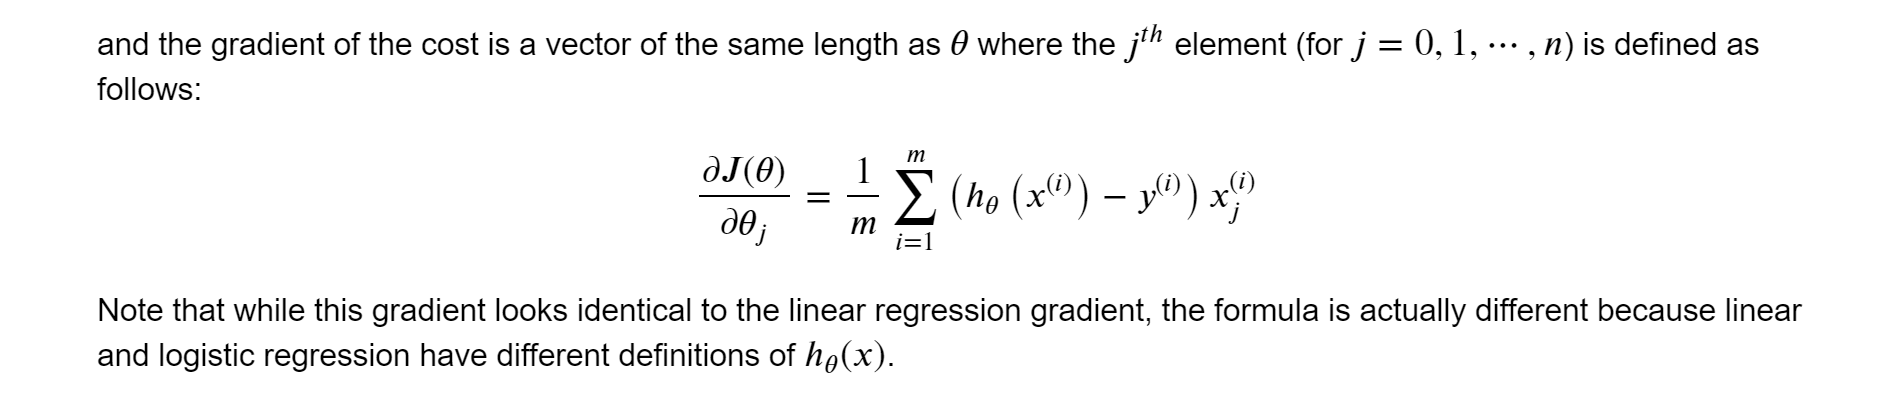

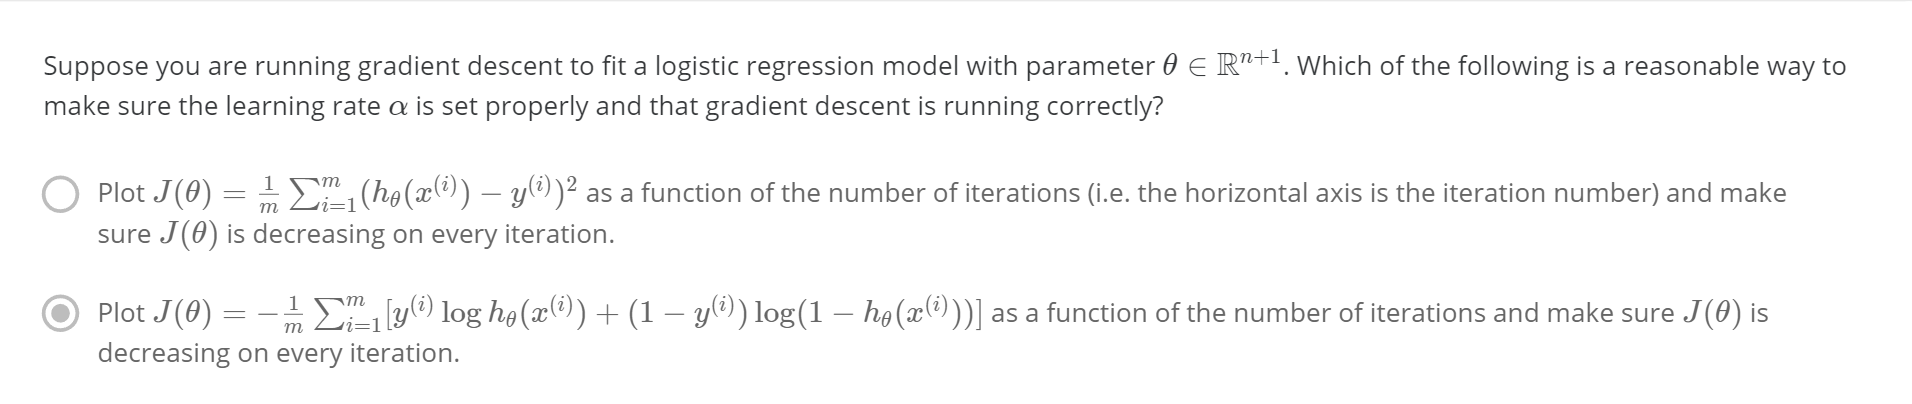

In [10]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to  the cost. Compute the partial derivatives and 
    set grad to the partial derivatives of the cost w.r.t. each parameter in theta.
    
    """
    # Initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [11]:
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


#### Gradient Descent

Remember that the general form of gradient descent is:

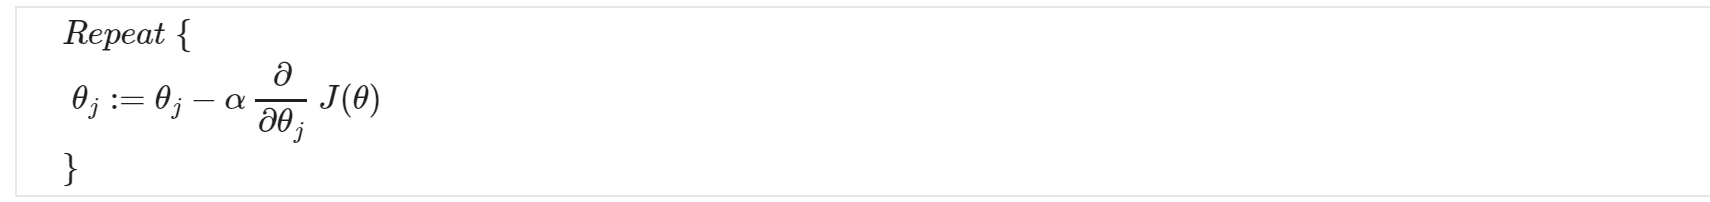

We can work out the derivative part using calculus to get:

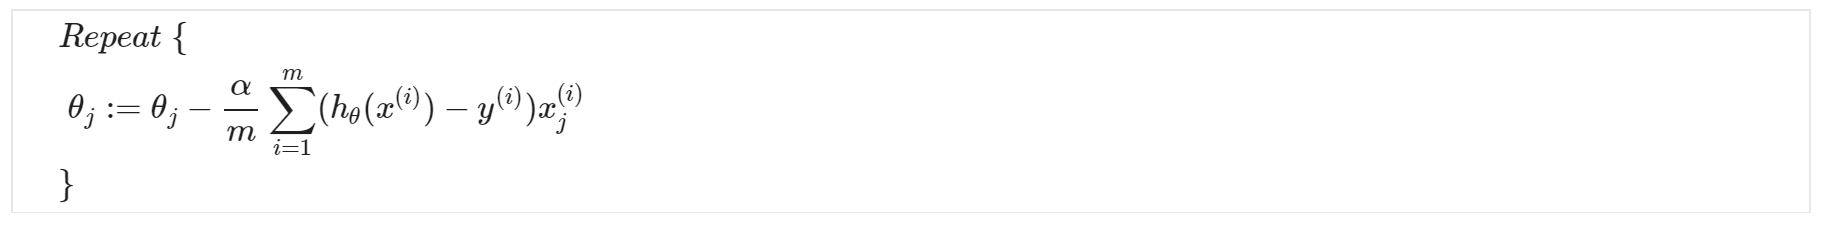


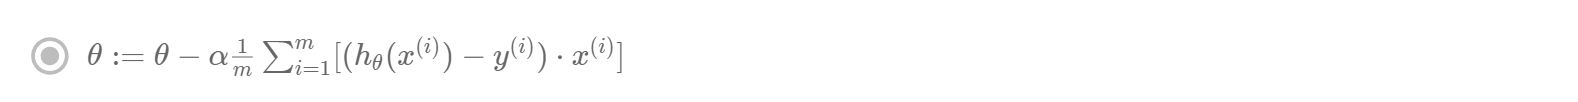
Notice that this algorithm is identical to the one we used in linear regression. We still have to simultaneously update all values in theta.

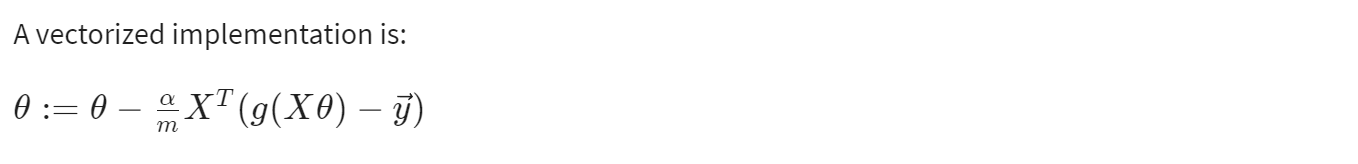

In [12]:
# Optimization module in scipy
from scipy import optimize

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradient descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use the scipy.optimize module. It provides an optimization module for root finding and minimization.

In [13]:
# set options for optimize.minimize
options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

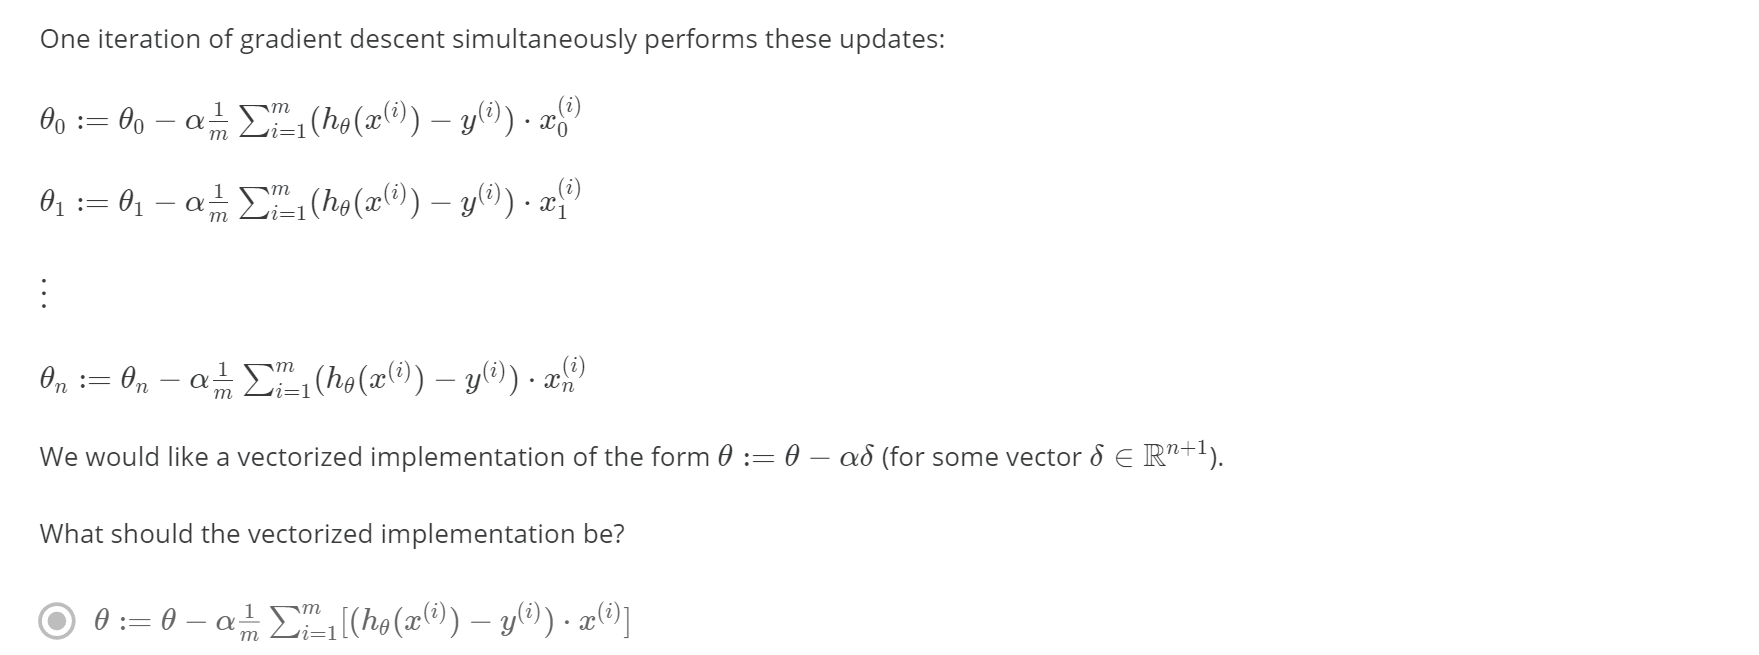

In [14]:
# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


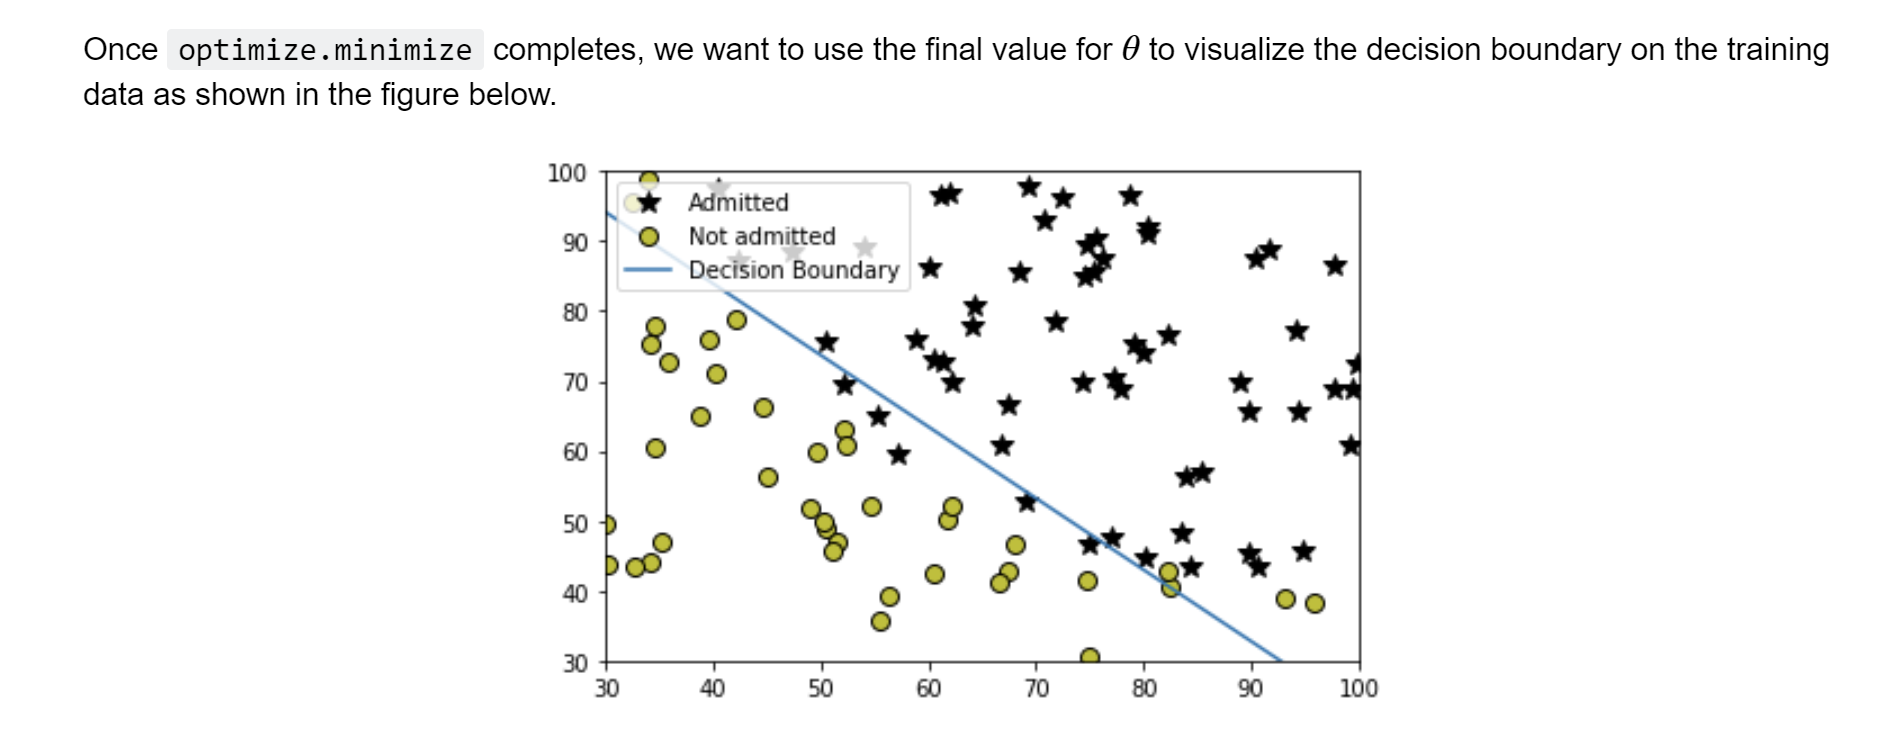

In [16]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    """
    m = X.shape[0] # Number of training examples
    # You need to return the following variables correctly
    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [17]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


In [27]:
theta  # optimal value of theta

array([-25.16131863,   0.20623159,   0.20147149])

In [26]:
predict(theta,np.array([1, 45, 85]))

1.0

#### Multiclass Classification: One-vs-all

We are basically choosing one class and then lumping all the others into a single second class. We do this repeatedly, applying binary logistic regression to each case, and then use the hypothesis that returned the highest value as our prediction.

The following image shows how one could classify 3 classes: 

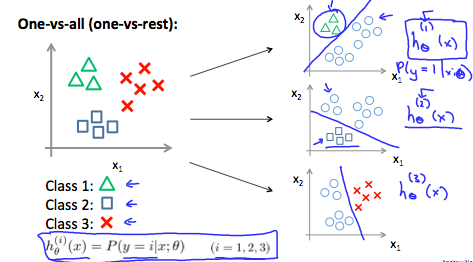

1. Train a logistic regression classifier $h_θ(i)(x)$ for each class i to predict the probability that y = i.
2. On a new input, x to make a prediction, pick the class i that maximizes the probability that $h_θ(i)(x)$ = 1 

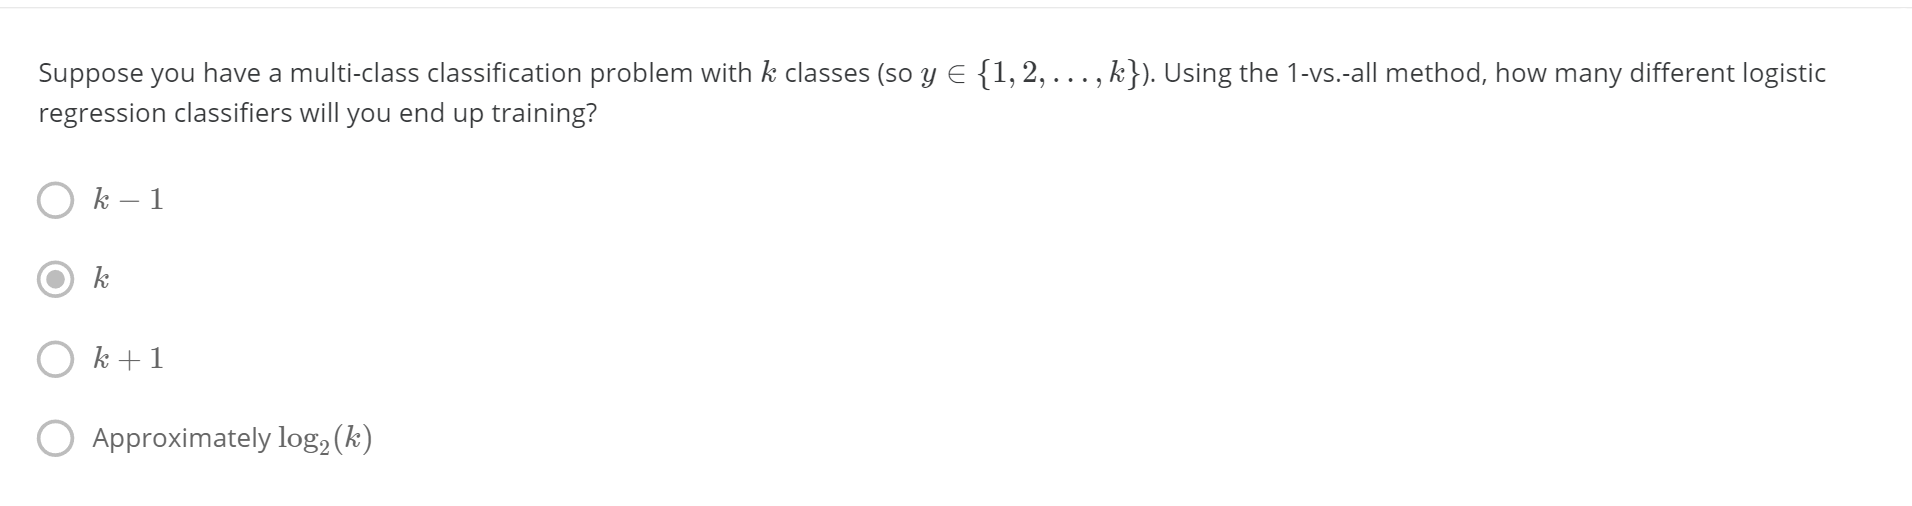

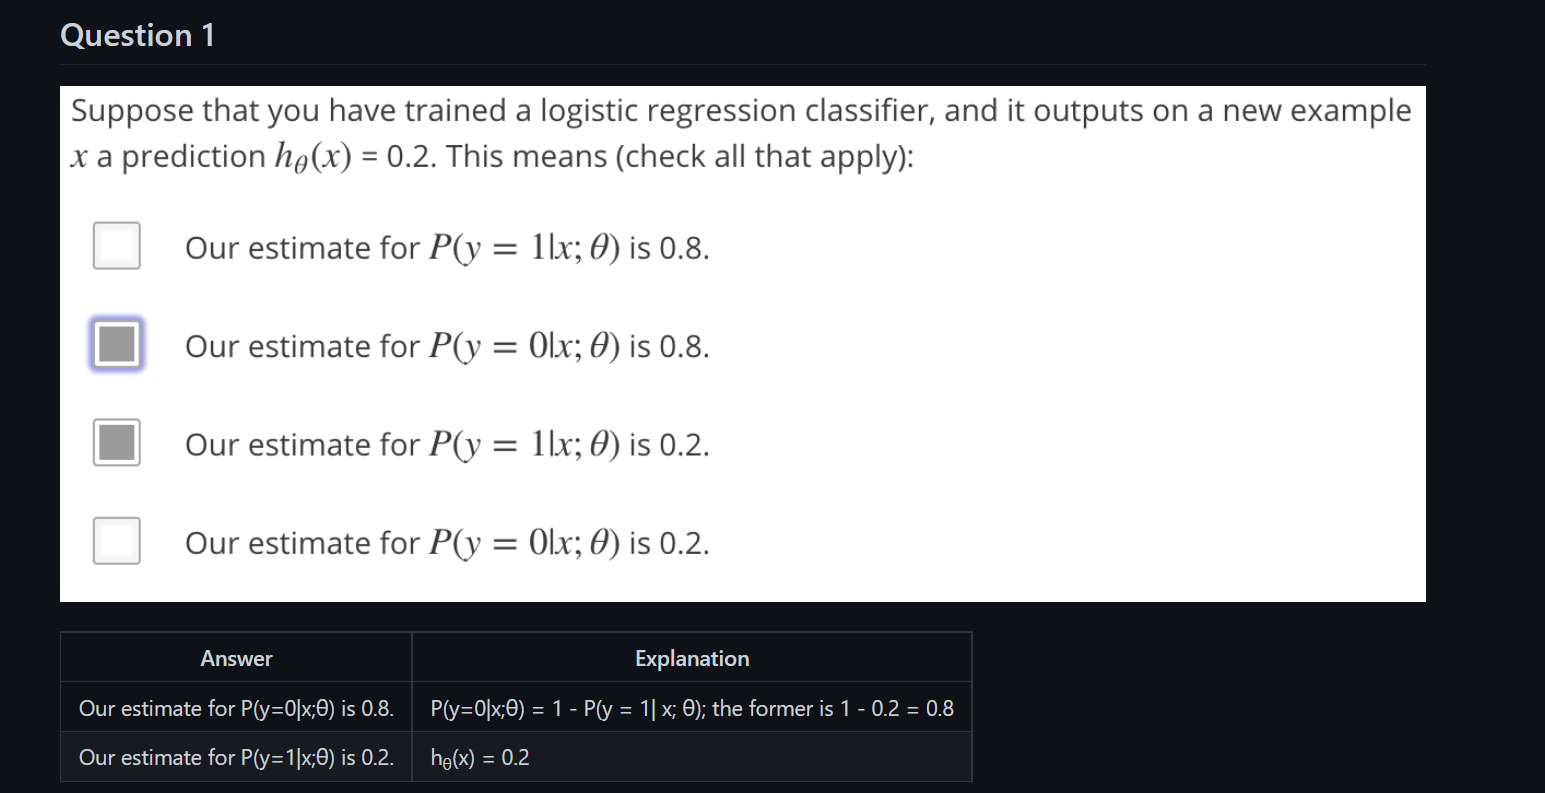

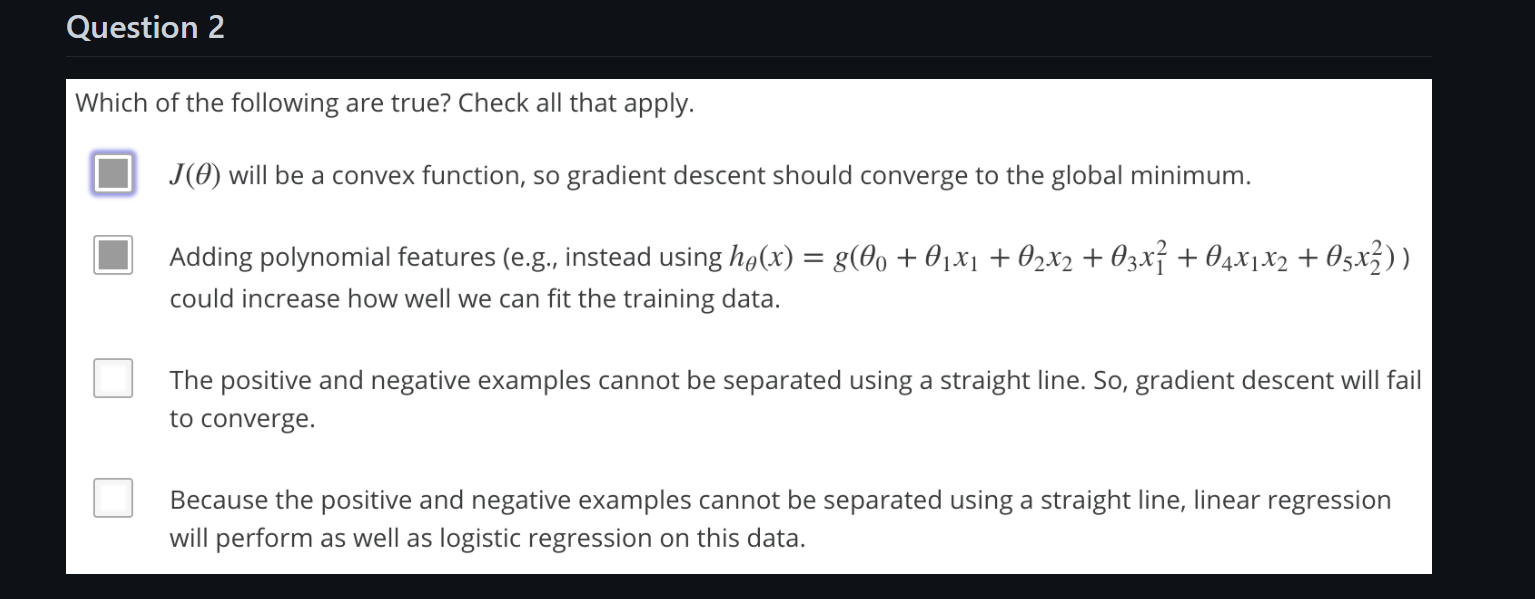

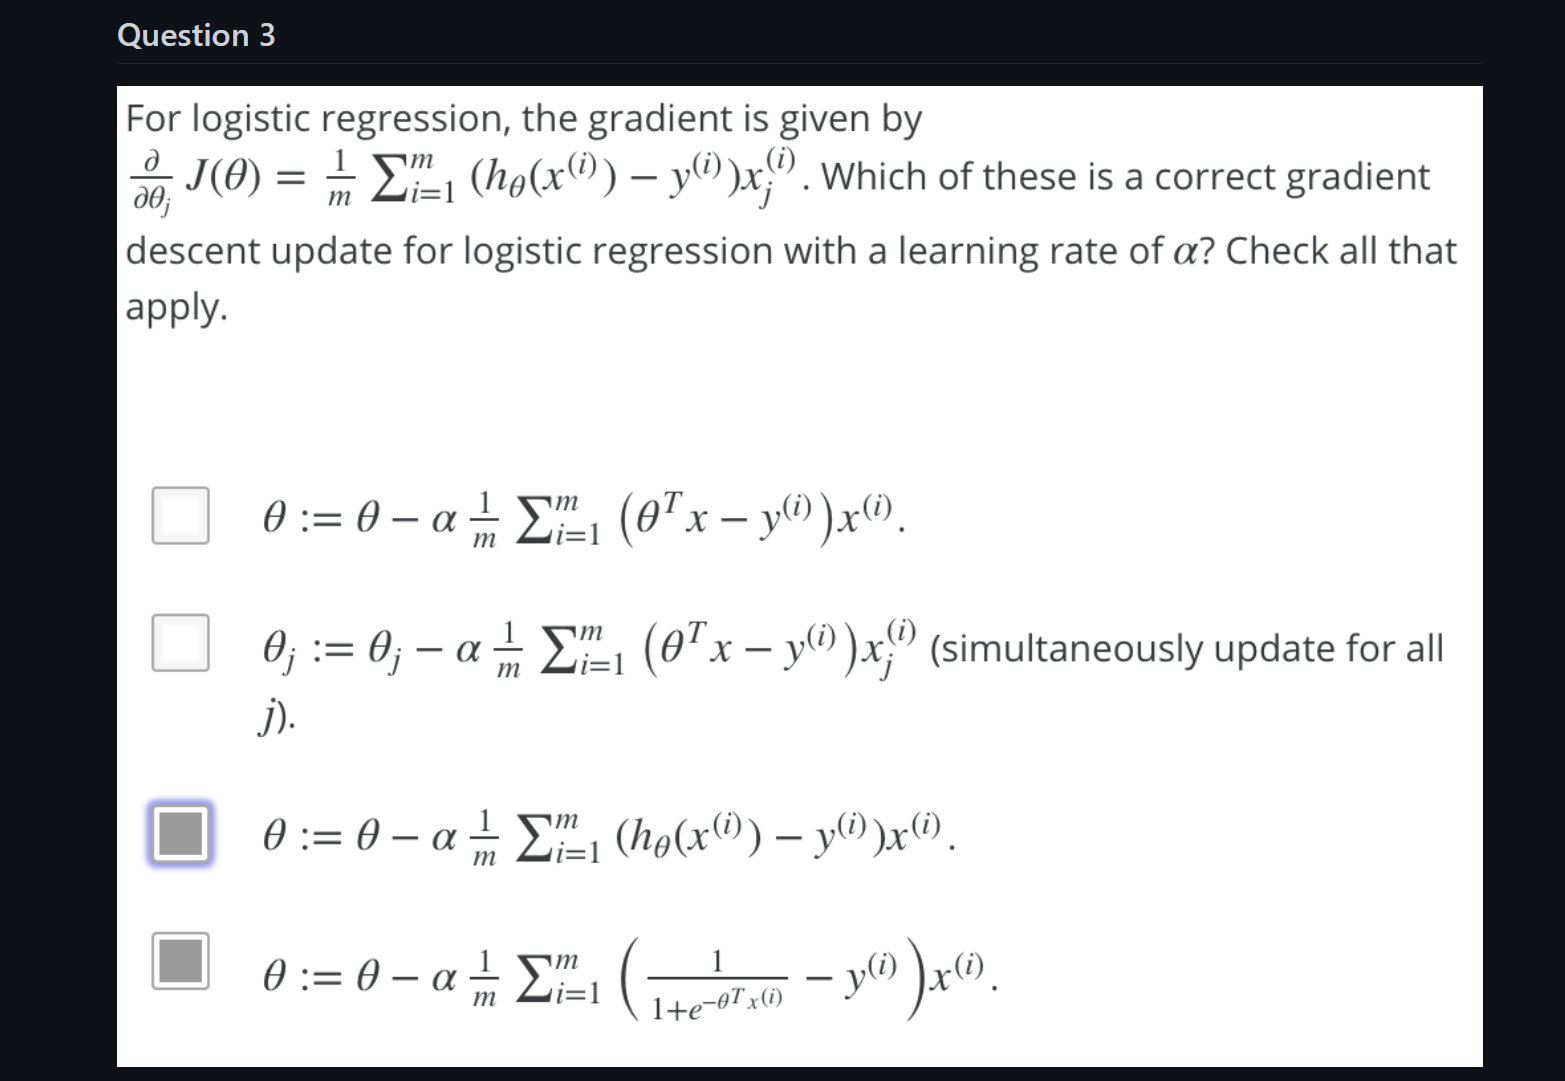

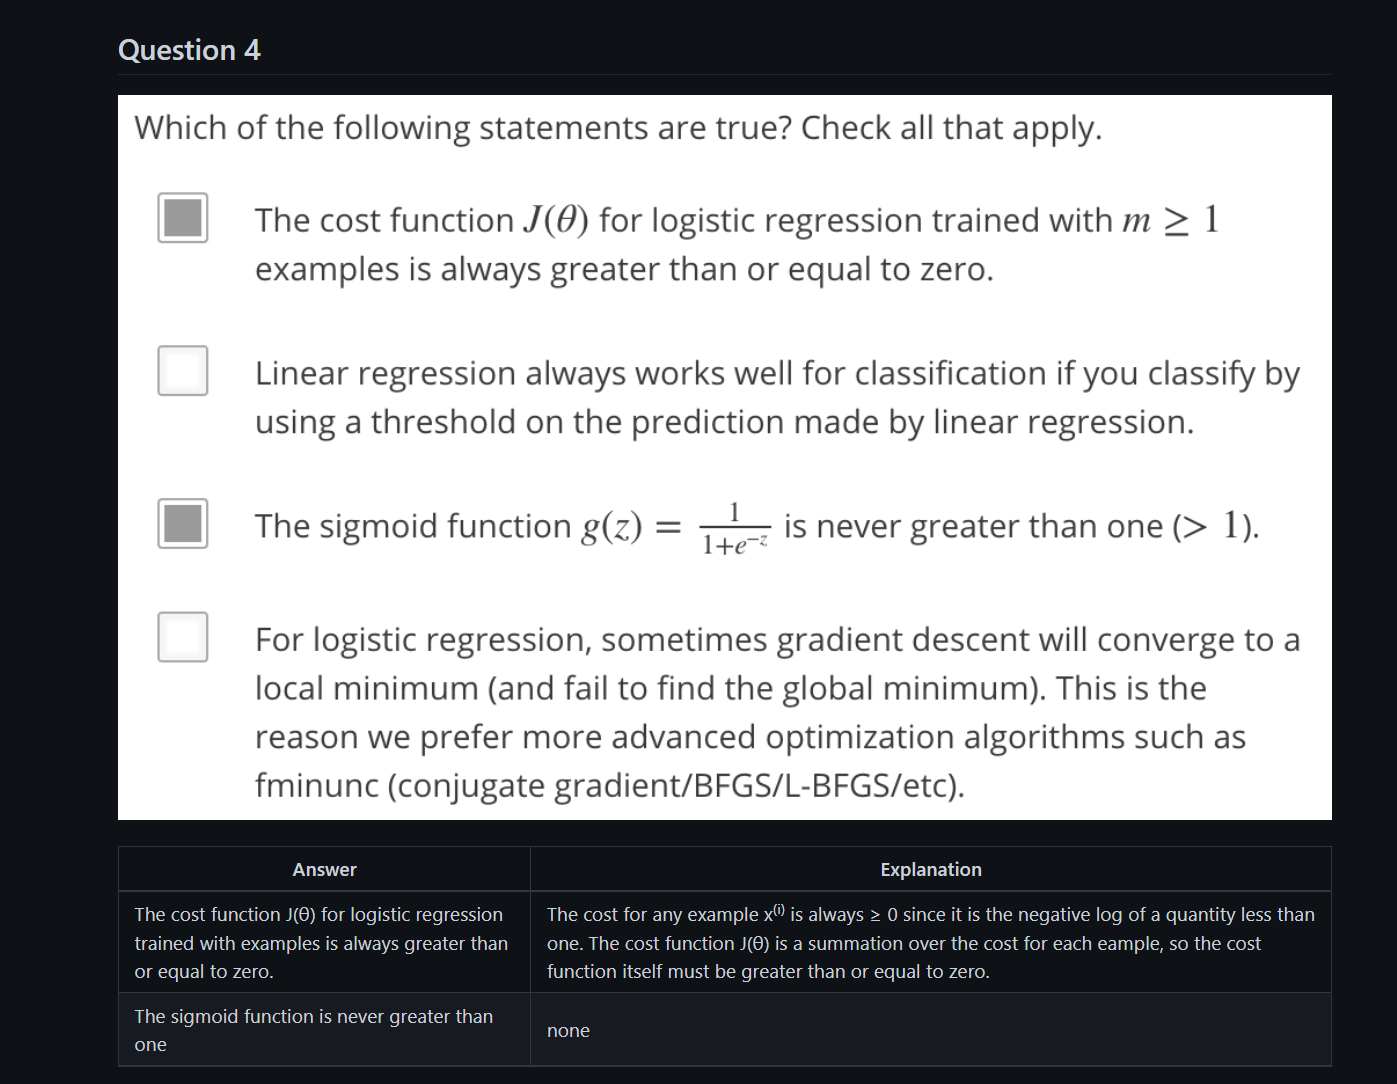

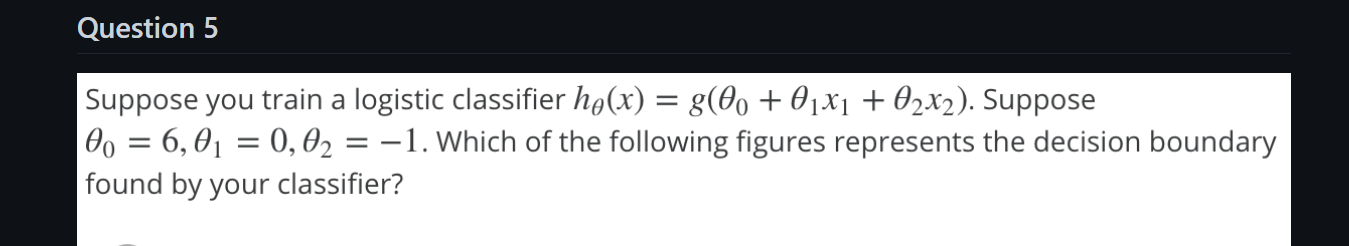
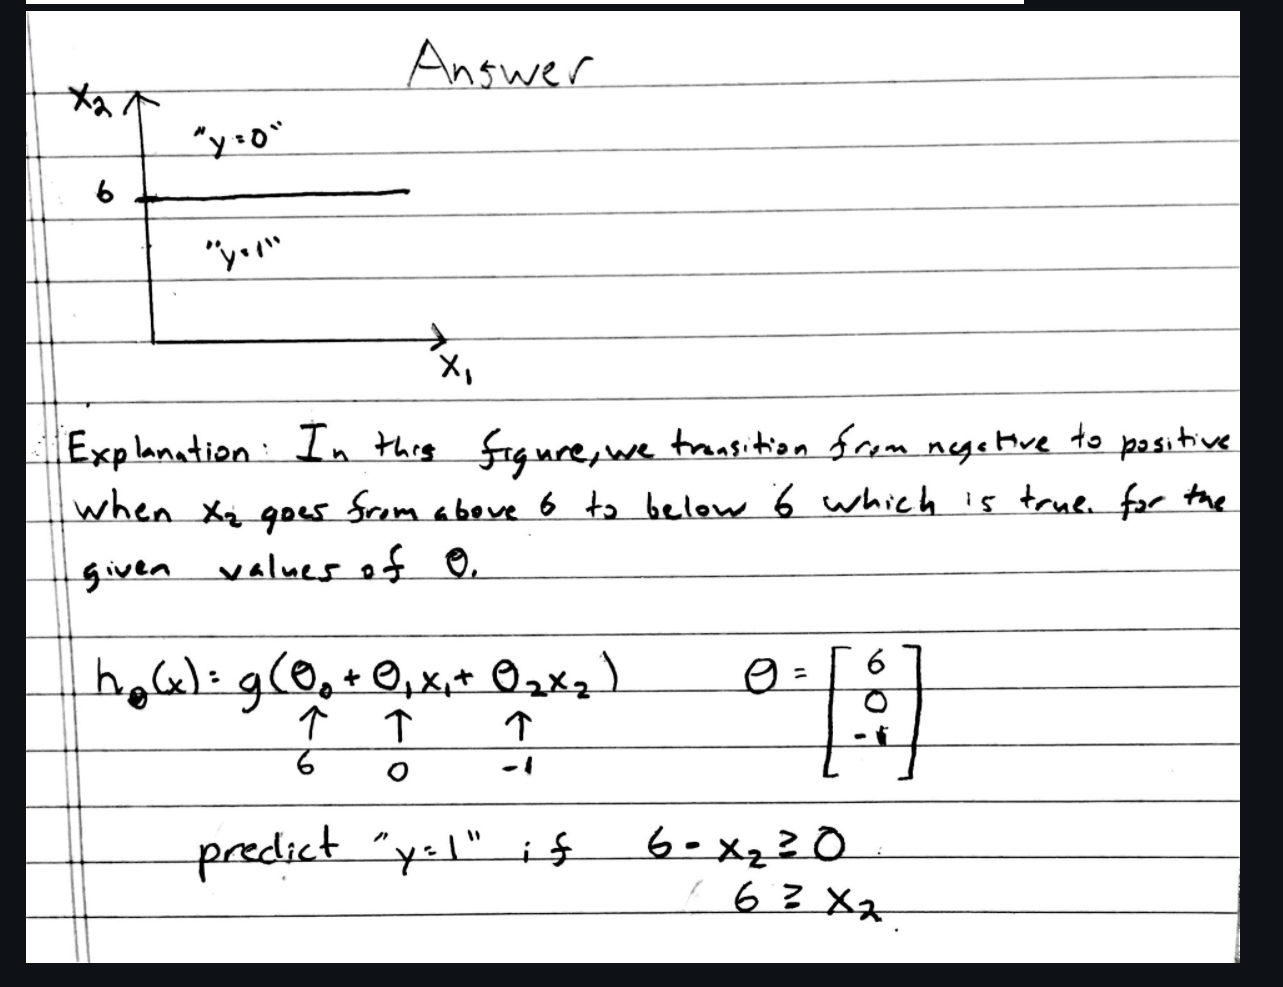

#### The Problem of Overfitting

The learned model works well for training data but terrible for testing data (unknown data). In other words, the model has little training error but has huge perdition error.

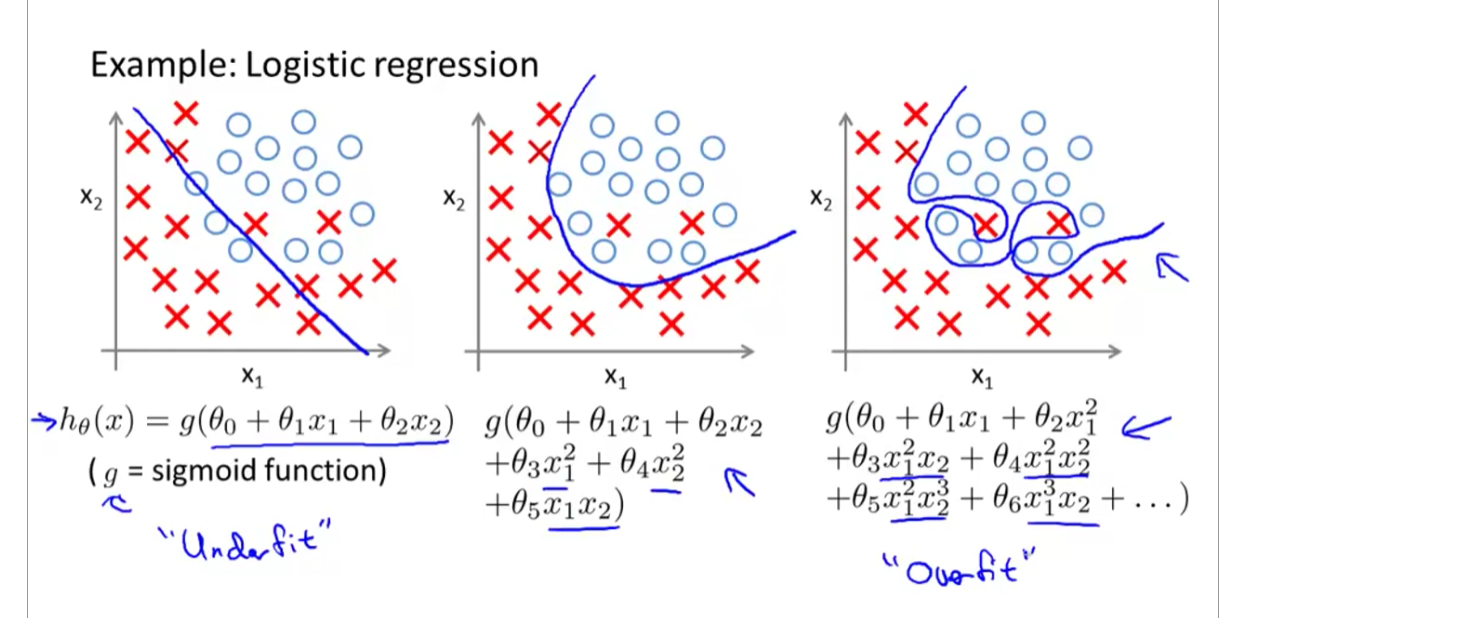

There are two main options to address the issue of overfitting:

1) Reduce the number of features:

    Manually select which features to keep.
    Use a model selection algorithm 

2) Regularization

    Keep all the features, but reduce the magnitude of parameters $theta_jθ$
    Regularization works well when we have a lot of slightly useful features.


If we have overfitting from our hypothesis function, we can reduce the weight that some of the terms in our function carry by increasing their cost.

Say we wanted to make the following function more quadratic:

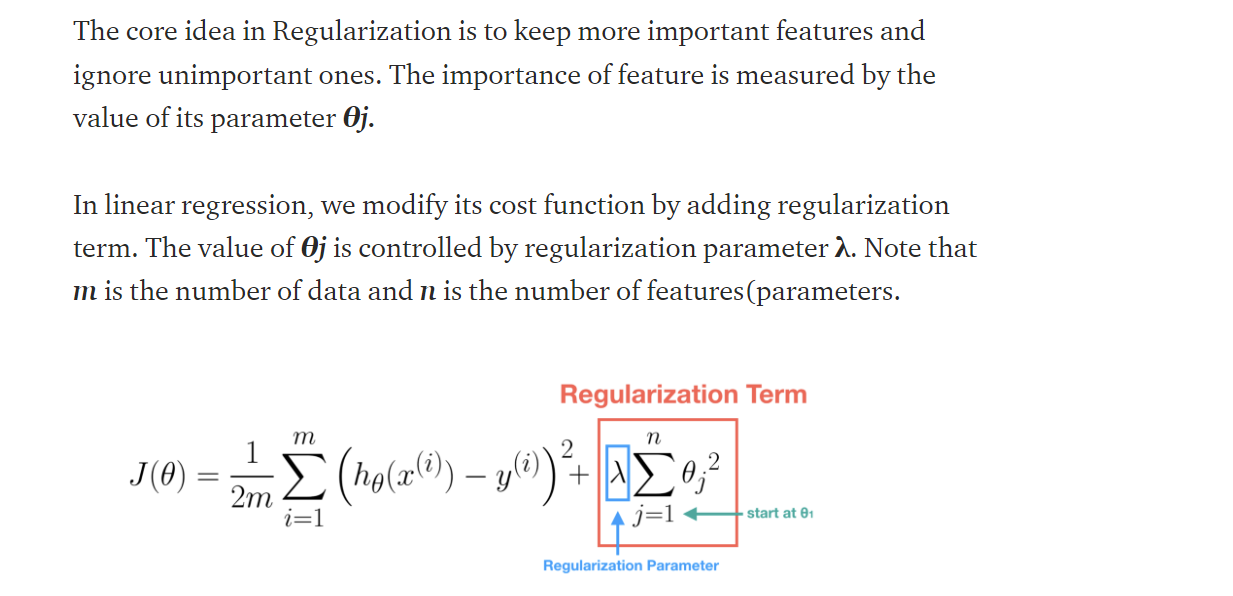

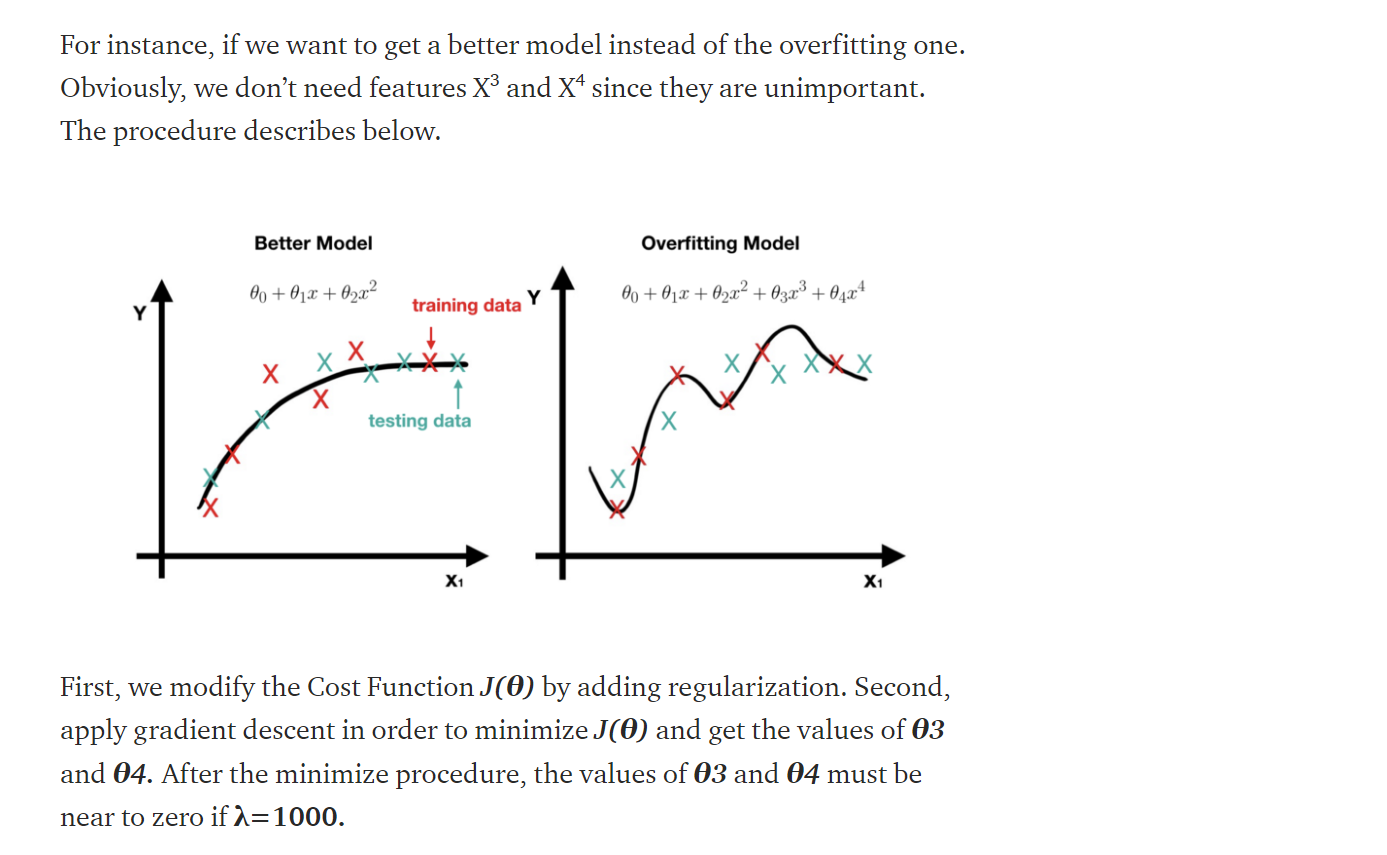

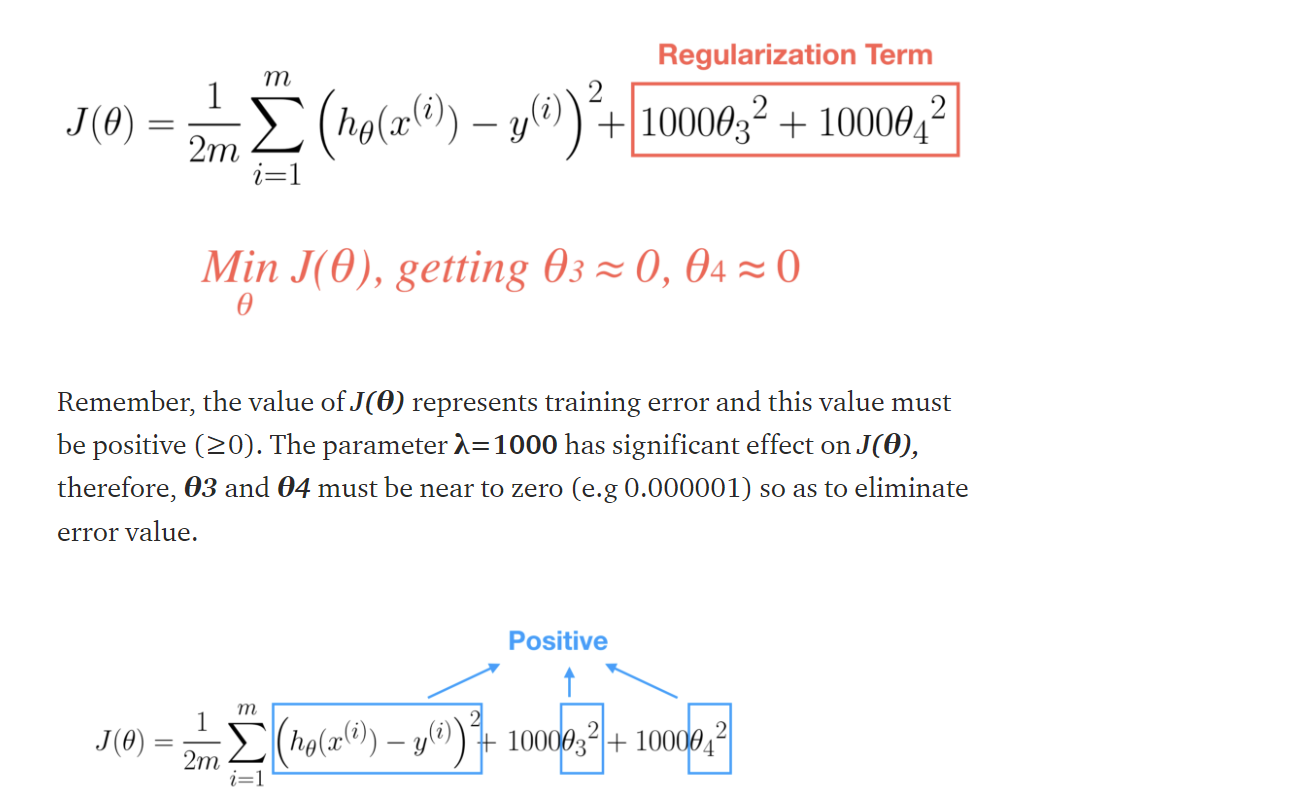

The λ, or lambda, is the regularization parameter. It determines how much the costs of our theta parameters are inflated. 

Using the above cost function with the extra summation, we can smooth the output of our hypothesis function to reduce overfitting. If lambda is chosen to be too large, it may smooth out the function too much and cause underfitting. Hence, what would happen if λ=0 or is too small ?

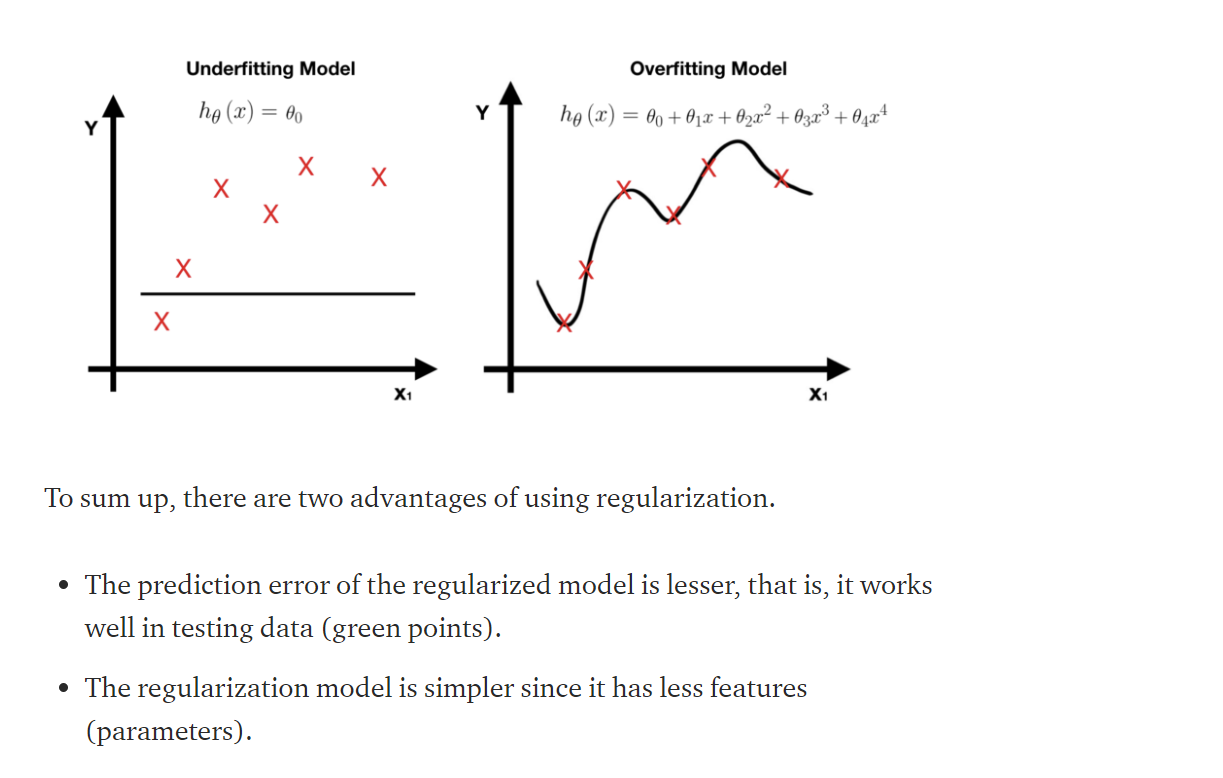

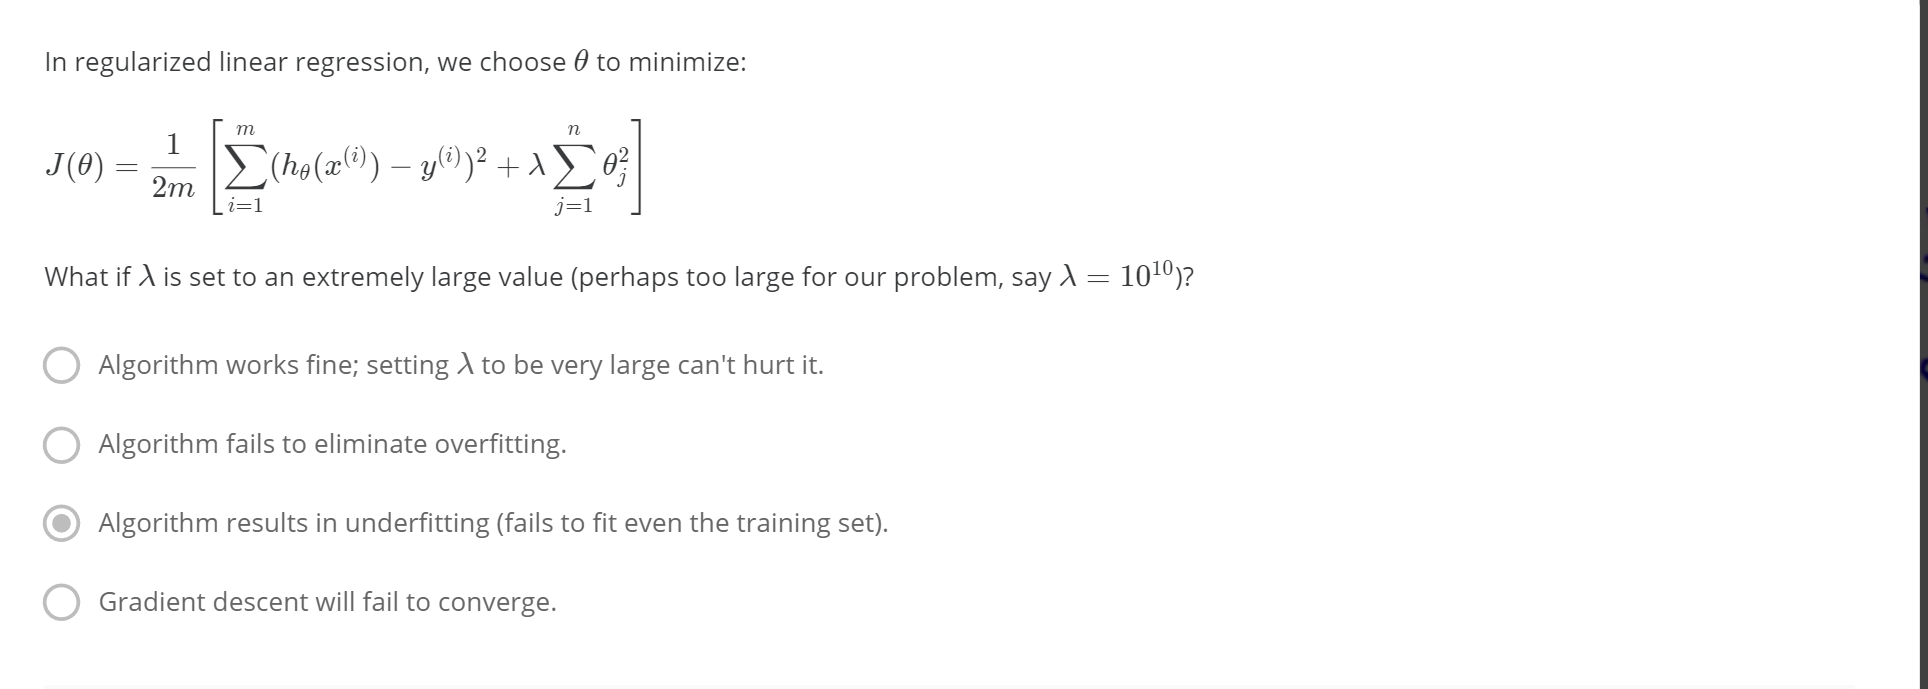

So far, we have discussed the concept of regularization. Next, we will show how to minimize regularized cost function by using gradient descent.

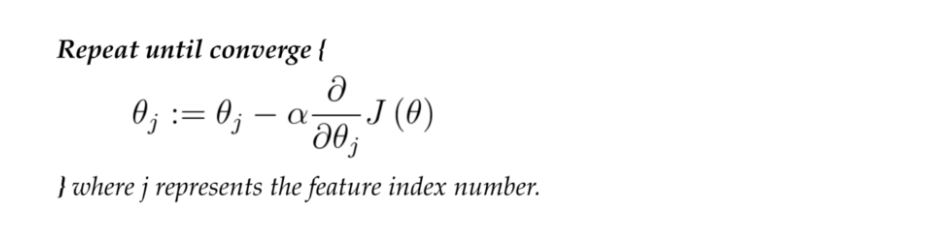

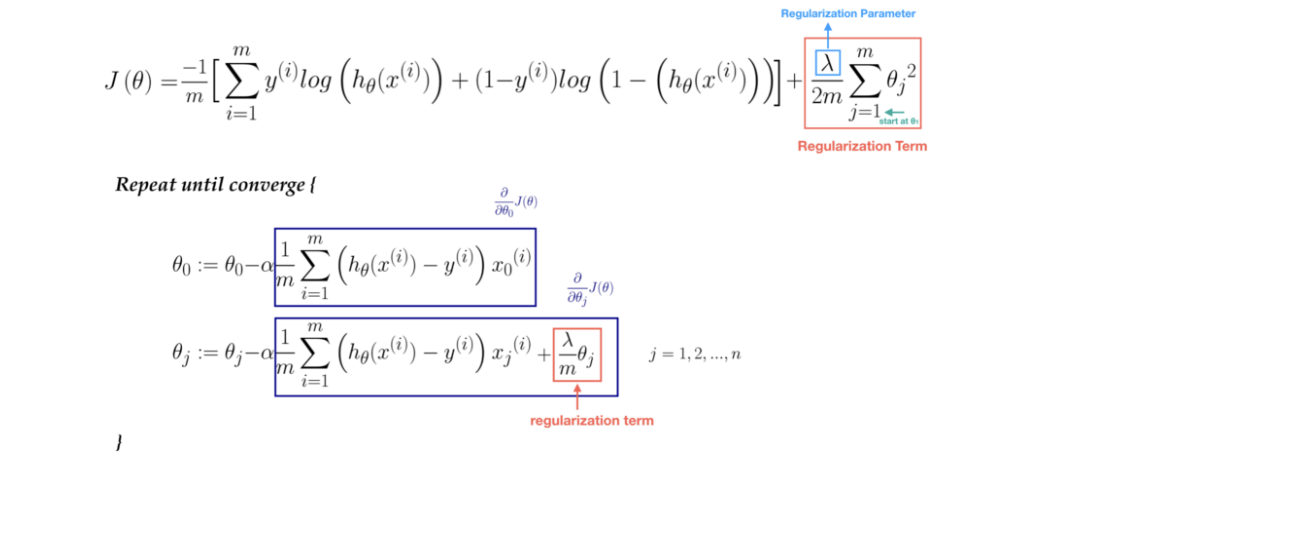

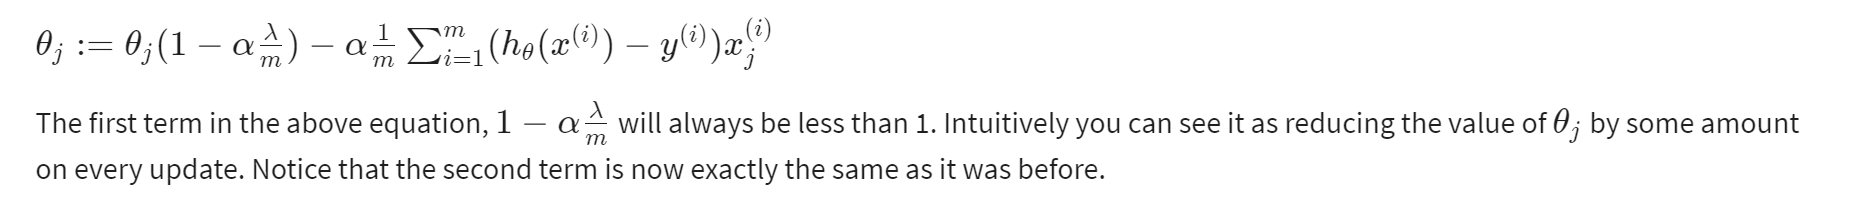



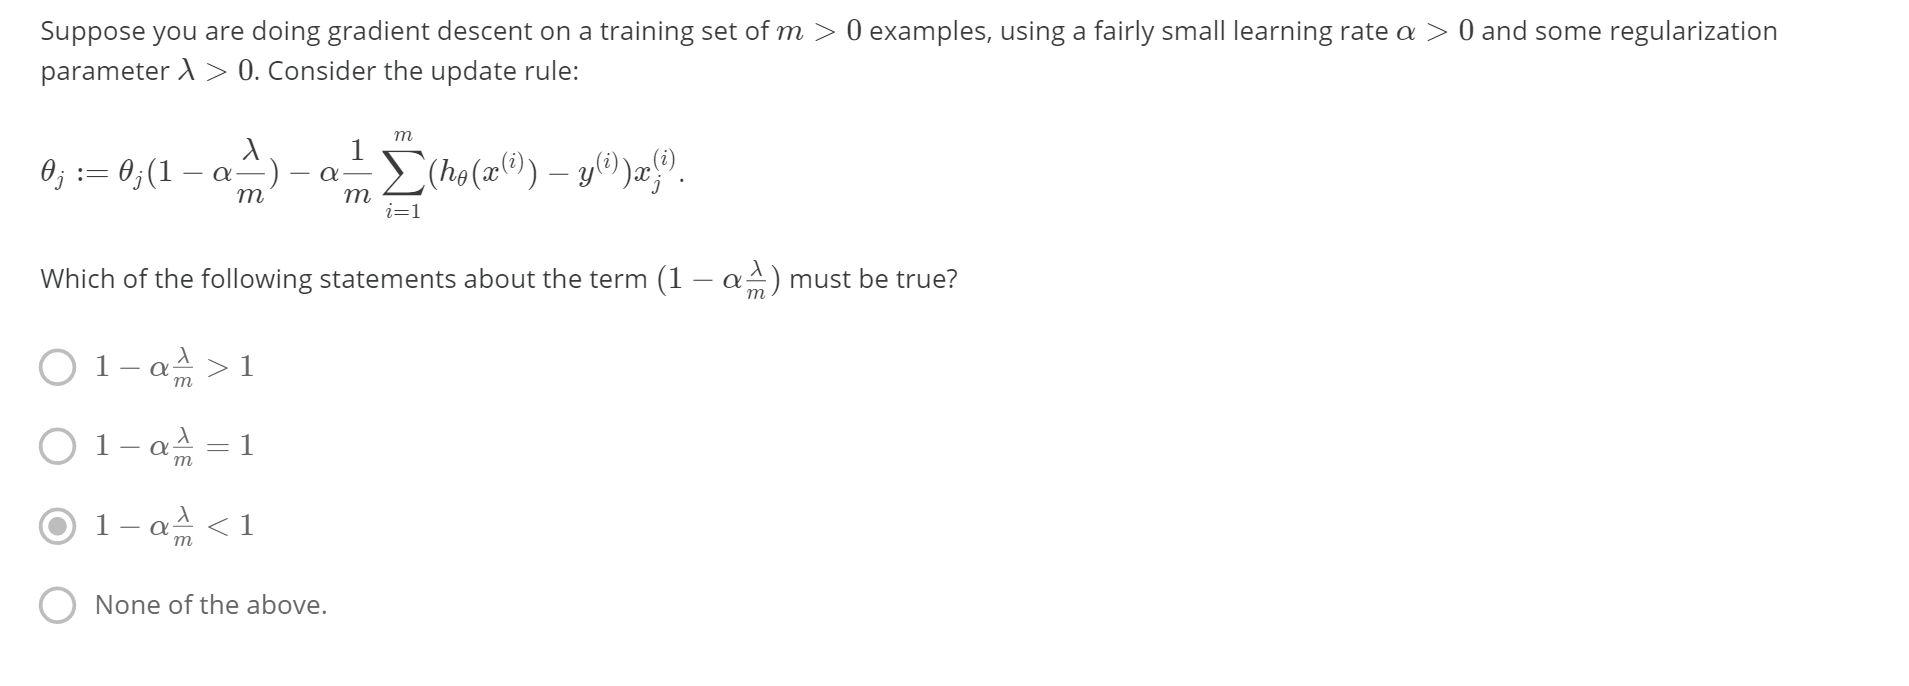

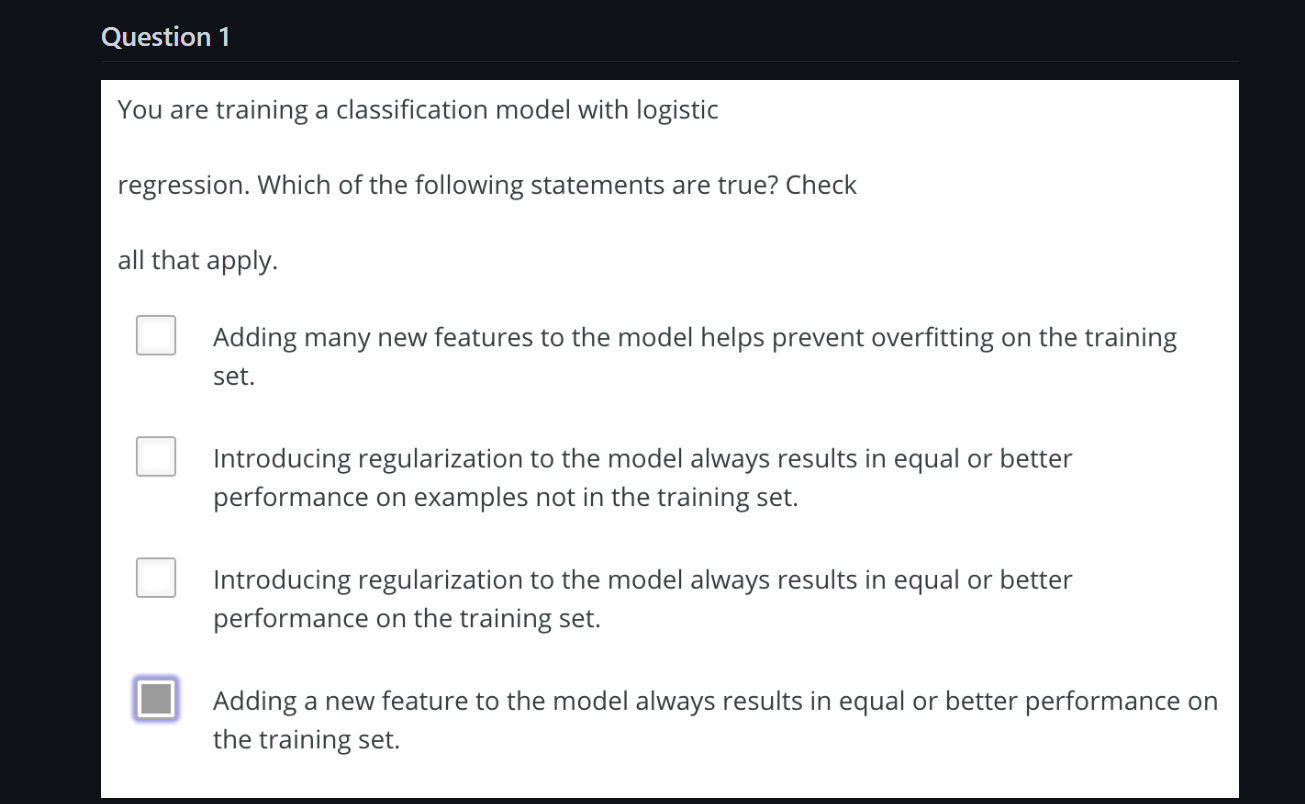

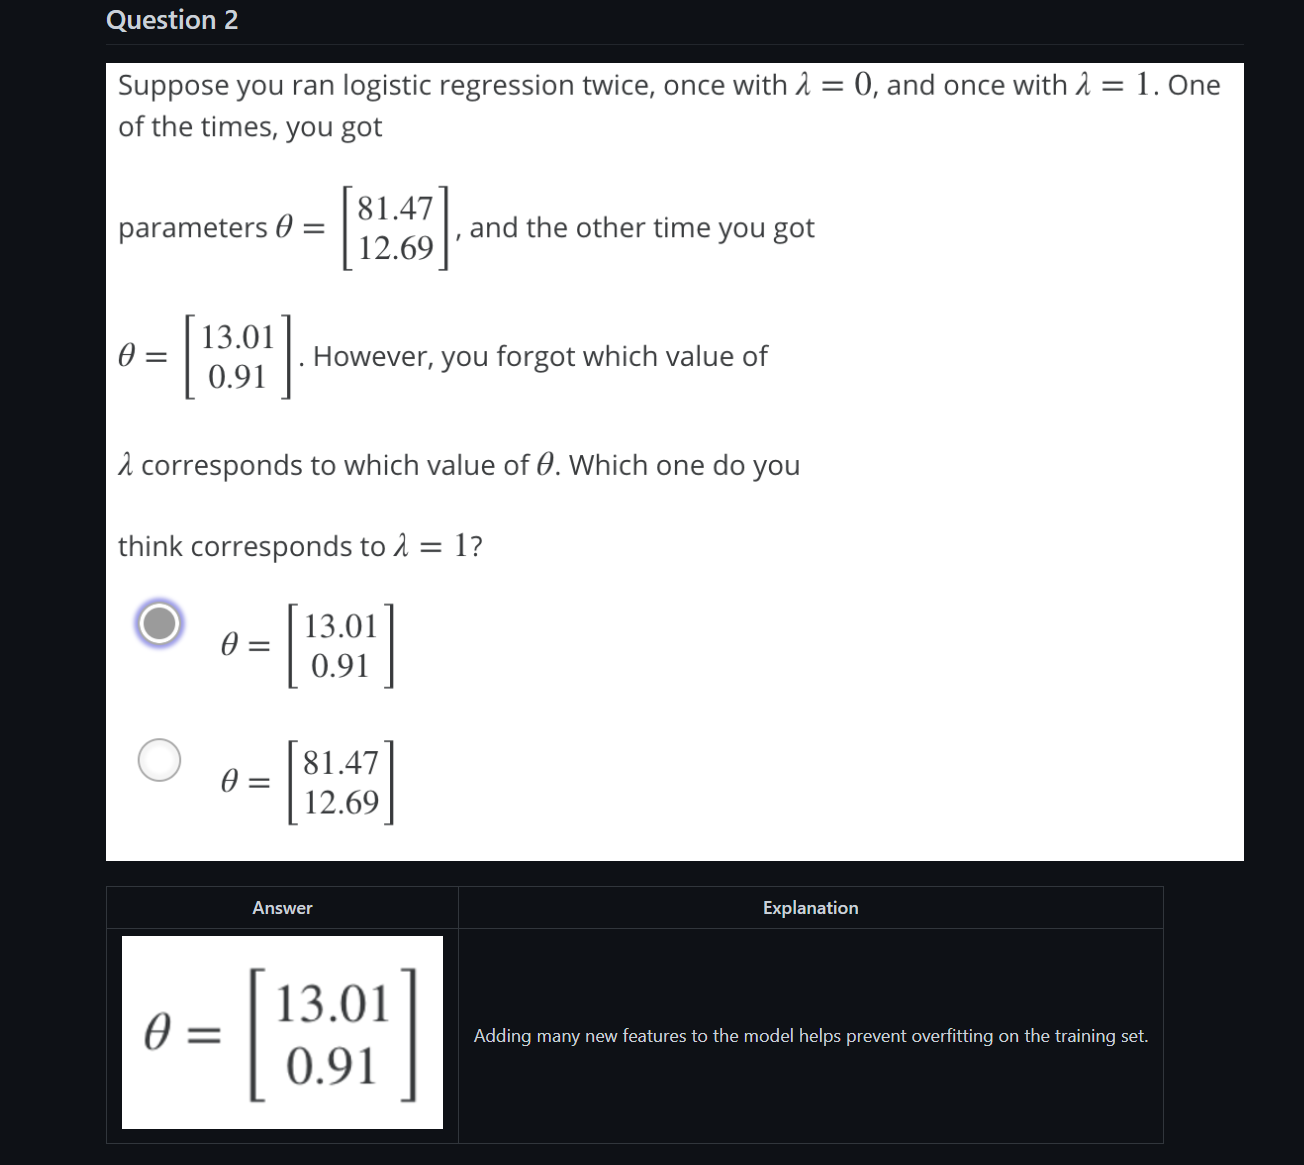

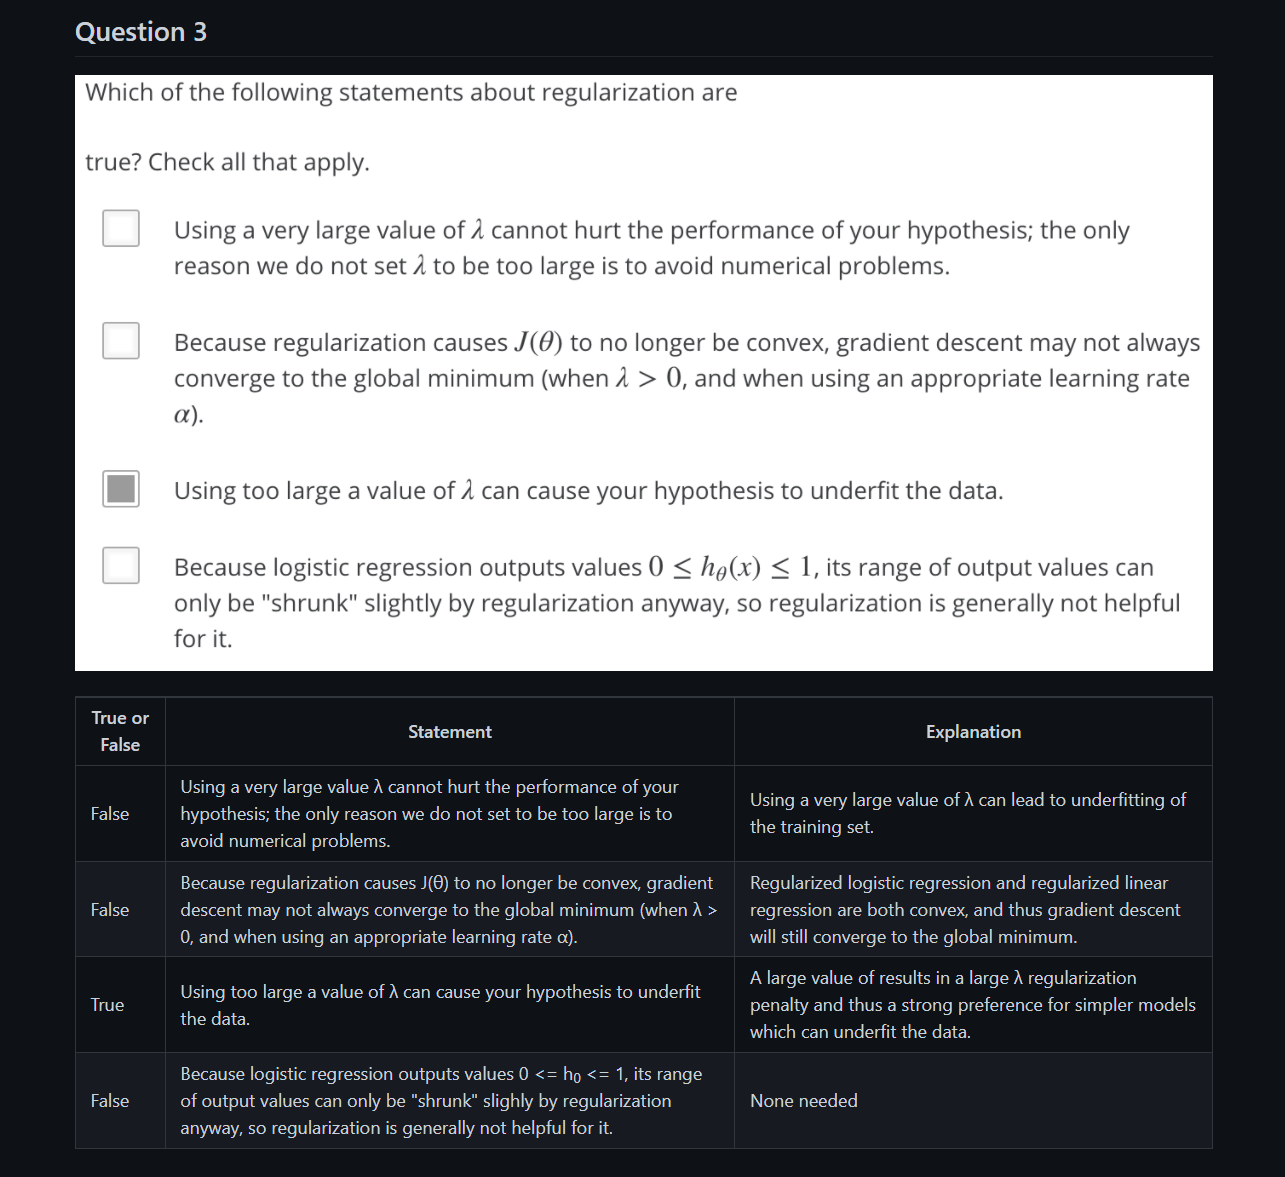

In [28]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data', 'ex2data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]

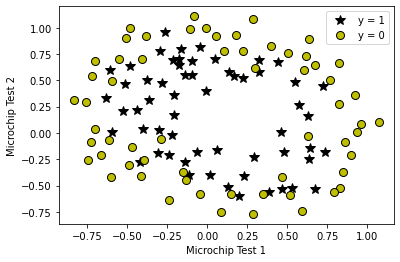

In [29]:
plotData(X, y)
# Labels and Legend
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')

# Specified in plot order
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pass

In [127]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    temp = theta
    temp[0] = 0
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    
    grad = (1 / m) * (h - y).dot(X) 
    grad = grad + (lambda_ / m) * temp
    return J, grad

###  Feature mapping

One way to fit the data better is to create more features from each data point. In the function `mapFeature` defined in the file `utils.py`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [128]:
import utils

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = utils.mapFeature(X[:, 0], X[:, 1])

In [129]:
X[:1]

array([[1.00000000e+00, 5.12670000e-02, 6.99560000e-01, 2.62830529e-03,
        3.58643425e-02, 4.89384194e-01, 1.34745327e-04, 1.83865725e-03,
        2.50892595e-02, 3.42353606e-01, 6.90798869e-06, 9.42624411e-05,
        1.28625106e-03, 1.75514423e-02, 2.39496889e-01, 3.54151856e-07,
        4.83255257e-06, 6.59422333e-05, 8.99809795e-04, 1.22782870e-02,
        1.67542444e-01, 1.81563032e-08, 2.47750473e-07, 3.38066048e-06,
        4.61305487e-05, 6.29470940e-04, 8.58939846e-03, 1.17205992e-01]])

In [130]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1

lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at test theta - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


In [133]:
p = predict(theta, X)

In [134]:
print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))

Train Accuracy: 83.1 %


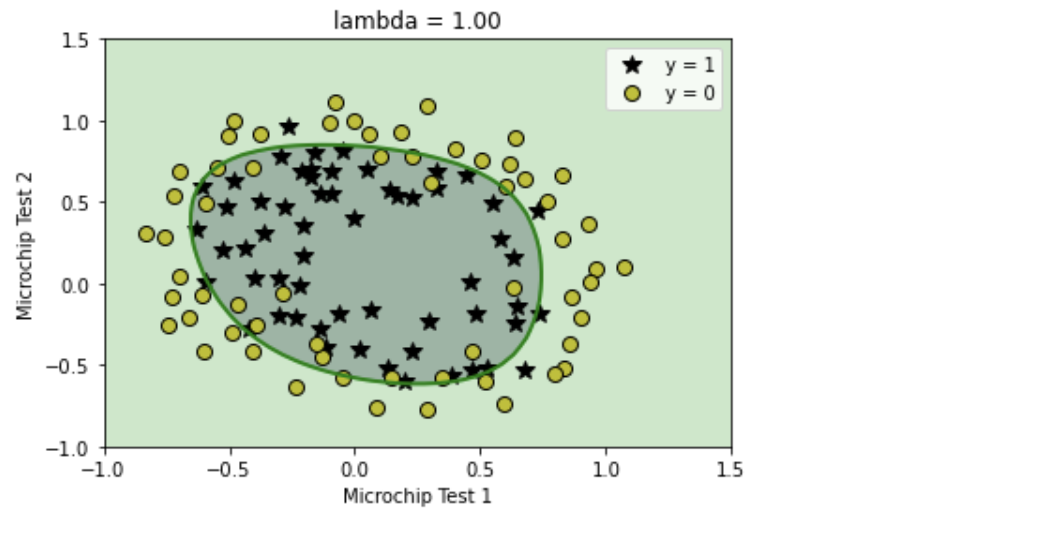